## COVID-19 Analysis - The Italian case - Andrea Gatto

In [1]:
import numpy as np

import matplotlib.pyplot as plt 
import operator
from matplotlib.pyplot import figure

import pandas as pd  
import seaborn as sns 


from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import time
import datetime


ora devo leggere il file, lo faccio con pandas

In [2]:
path = '../../COVID-19/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'

dataframe_andamento_nazionale = pd.read_csv(path, delimiter = ',')

dataframe_andamento_nazionale #la visualizzazione così ordinata è fatta da pandas, il csv è un file disordinatissimo 

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi,casi_testati,note_it,note_en
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN,NaN
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN,NaN
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN,NaN
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN,NaN
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2020-04-22T17:00:00,ITA,23805,2384,26189,81510,107699,-10,3370,54543,25085,187327,1513251,1015494.0,NaN,NaN
59,2020-04-23T17:00:00,ITA,22871,2267,25138,81710,106848,-851,2646,57576,25549,189973,1579909,1052577.0,pd-IT-0015;pd-IT-0017,pd-EN-0015;pd-EN-0017
60,2020-04-24T17:00:00,ITA,22068,2173,24241,82286,106527,-321,3021,60498,25969,192994,1642356,1147850.0,dc-IT-0009;dc-IT-0011,dc-EN-0009;dc-EN-0011
61,2020-04-25T17:00:00,ITA,21533,2102,23635,82212,105847,-680,2357,63120,26384,195351,1707743,1186526.0,NaN,NaN


In [3]:
features = dataframe_andamento_nazionale.columns.values #così features sarà un indice pandas se non uso values. Con .values accedo al contenuto di quell'indice e mi restituisce la lista

In [4]:
print(features)

['data' 'stato' 'ricoverati_con_sintomi' 'terapia_intensiva'
 'totale_ospedalizzati' 'isolamento_domiciliare' 'totale_positivi'
 'variazione_totale_positivi' 'nuovi_positivi' 'dimessi_guariti'
 'deceduti' 'totale_casi' 'tamponi' 'casi_testati' 'note_it' 'note_en']


In [5]:
#ora come primo step elimino le feature con i nan. uso il comando drop

dataframe_andamento_nazionale = dataframe_andamento_nazionale.drop(columns = ['casi_testati' , 'note_it' , 'note_en'])

In [6]:
dataframe_andamento_nazionale

,data,stato,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,dimessi_guariti,deceduti,totale_casi,tamponi
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695
...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,2020-04-22T17:00:00,ITA,23805,2384,26189,81510,107699,-10,3370,54543,25085,187327,1513251
59,2020-04-23T17:00:00,ITA,22871,2267,25138,81710,106848,-851,2646,57576,25549,189973,1579909
60,2020-04-24T17:00:00,ITA,22068,2173,24241,82286,106527,-321,3021,60498,25969,192994,1642356
61,2020-04-25T17:00:00,ITA,21533,2102,23635,82212,105847,-680,2357,63120,26384,195351,1707743


In [7]:
dataframe_andamento_nazionale['terapia_intensiva'] #mi fa vedere i dati sulla terapia intensiva.

0       26
1       35
2       36
3       56
4       64
      ... 
58    2384
59    2267
60    2173
61    2102
62    2009
Name: terapia_intensiva, Length: 63, dtype: int64

Di solito si vuole vedere come sono correlate tra di loro -> matrice di correlaziond avendo un dataframe pandas

## Plot the 'Pearson' Correlation Matrix

$$\large \rho_{X,Y} = \frac{\sum_{i} (x_{i} - \mu_{X})(y_{i}-\mu_{Y})}{\sqrt{\sum_{j}(x_{j}-\mu_{X})^2 \sum_{k} (y_{k}-\mu_{Y})^2}}$$

$$\large -1 \le \rho_{X,Y} \le 1$$

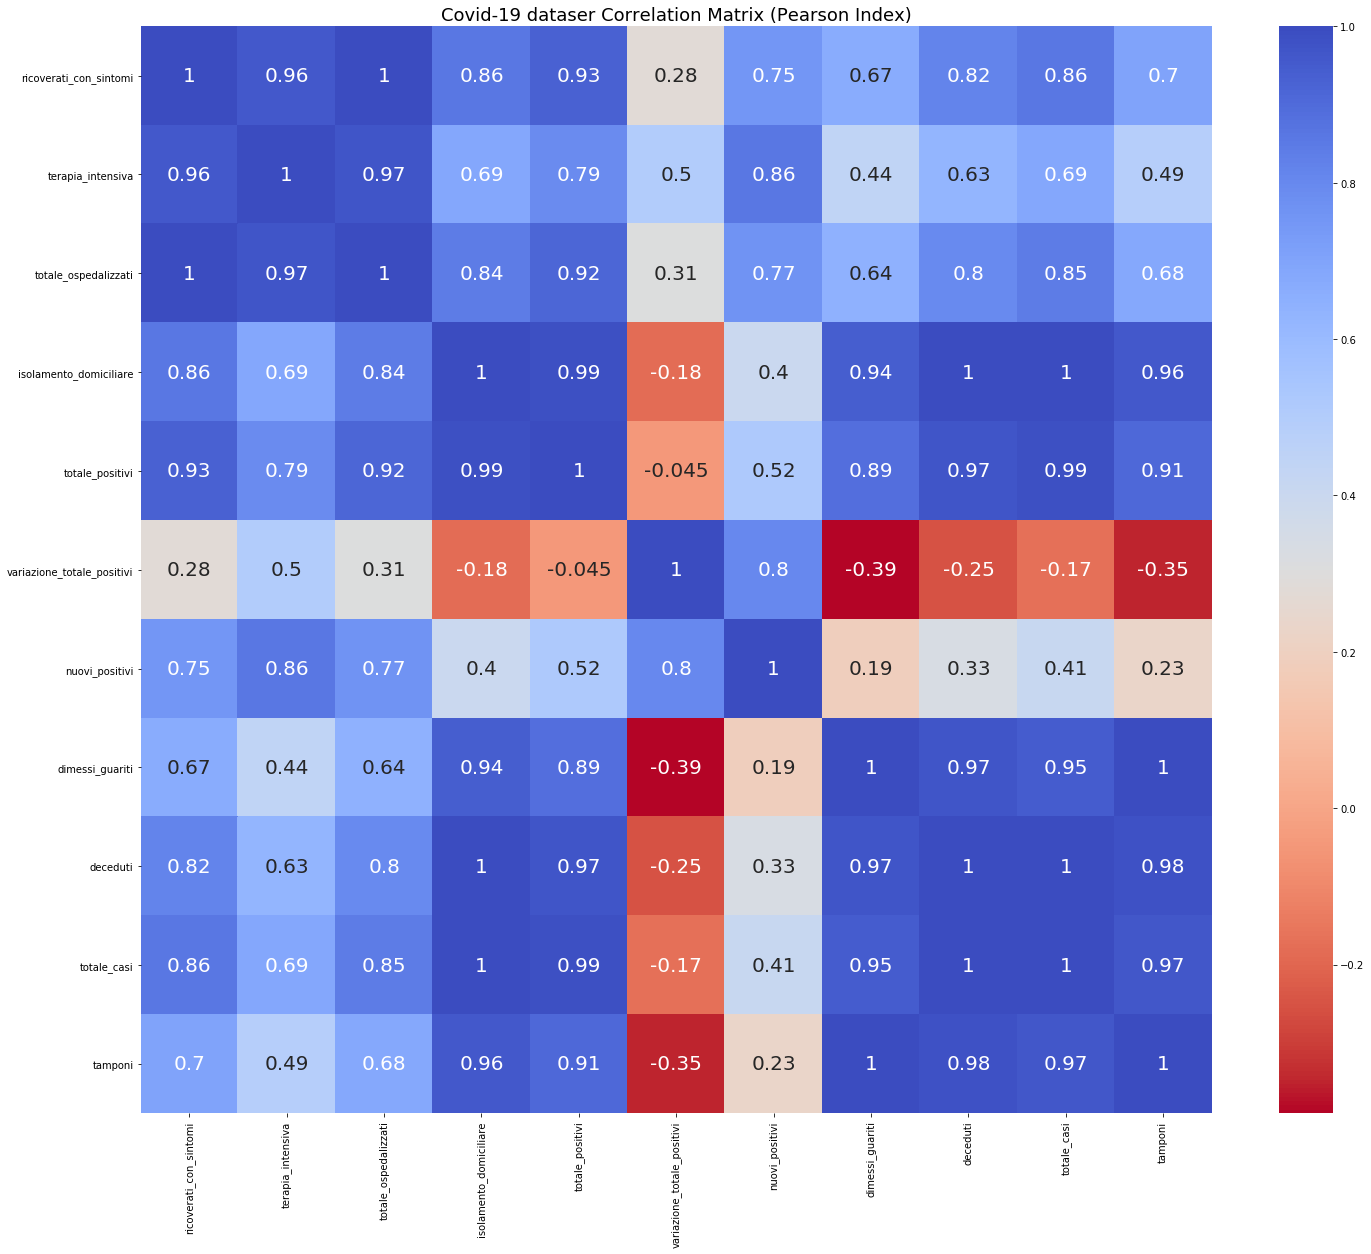

In [8]:
f, (ax1) = plt.subplots(1, 1, figsize=(24,20))
correlation_matrix = dataframe_andamento_nazionale.corr(method='pearson')
sns.heatmap(correlation_matrix, cmap='coolwarm_r', annot = True, annot_kws={'size':20}, ax=ax1)
ax1.set_title("Covid-19 dataser Correlation Matrix (Pearson Index)", fontsize=18)
plt.show()

## Dates

In [9]:
start_date = datetime.date(2020, 2, 24)

date = []
for i in range(dataframe_andamento_nazionale.shape[0]):
    date.append(start_date + datetime.timedelta(days = i))

In [10]:
X_tp_1 = dataframe_andamento_nazionale['totale_positivi']
y_ti_1 = dataframe_andamento_nazionale['terapia_intensiva']

print(date)

[datetime.date(2020, 2, 24), datetime.date(2020, 2, 25), datetime.date(2020, 2, 26), datetime.date(2020, 2, 27), datetime.date(2020, 2, 28), datetime.date(2020, 2, 29), datetime.date(2020, 3, 1), datetime.date(2020, 3, 2), datetime.date(2020, 3, 3), datetime.date(2020, 3, 4), datetime.date(2020, 3, 5), datetime.date(2020, 3, 6), datetime.date(2020, 3, 7), datetime.date(2020, 3, 8), datetime.date(2020, 3, 9), datetime.date(2020, 3, 10), datetime.date(2020, 3, 11), datetime.date(2020, 3, 12), datetime.date(2020, 3, 13), datetime.date(2020, 3, 14), datetime.date(2020, 3, 15), datetime.date(2020, 3, 16), datetime.date(2020, 3, 17), datetime.date(2020, 3, 18), datetime.date(2020, 3, 19), datetime.date(2020, 3, 20), datetime.date(2020, 3, 21), datetime.date(2020, 3, 22), datetime.date(2020, 3, 23), datetime.date(2020, 3, 24), datetime.date(2020, 3, 25), datetime.date(2020, 3, 26), datetime.date(2020, 3, 27), datetime.date(2020, 3, 28), datetime.date(2020, 3, 29), datetime.date(2020, 3, 30), 

# Behaviour of ICU hospitalizations and current positive cases 

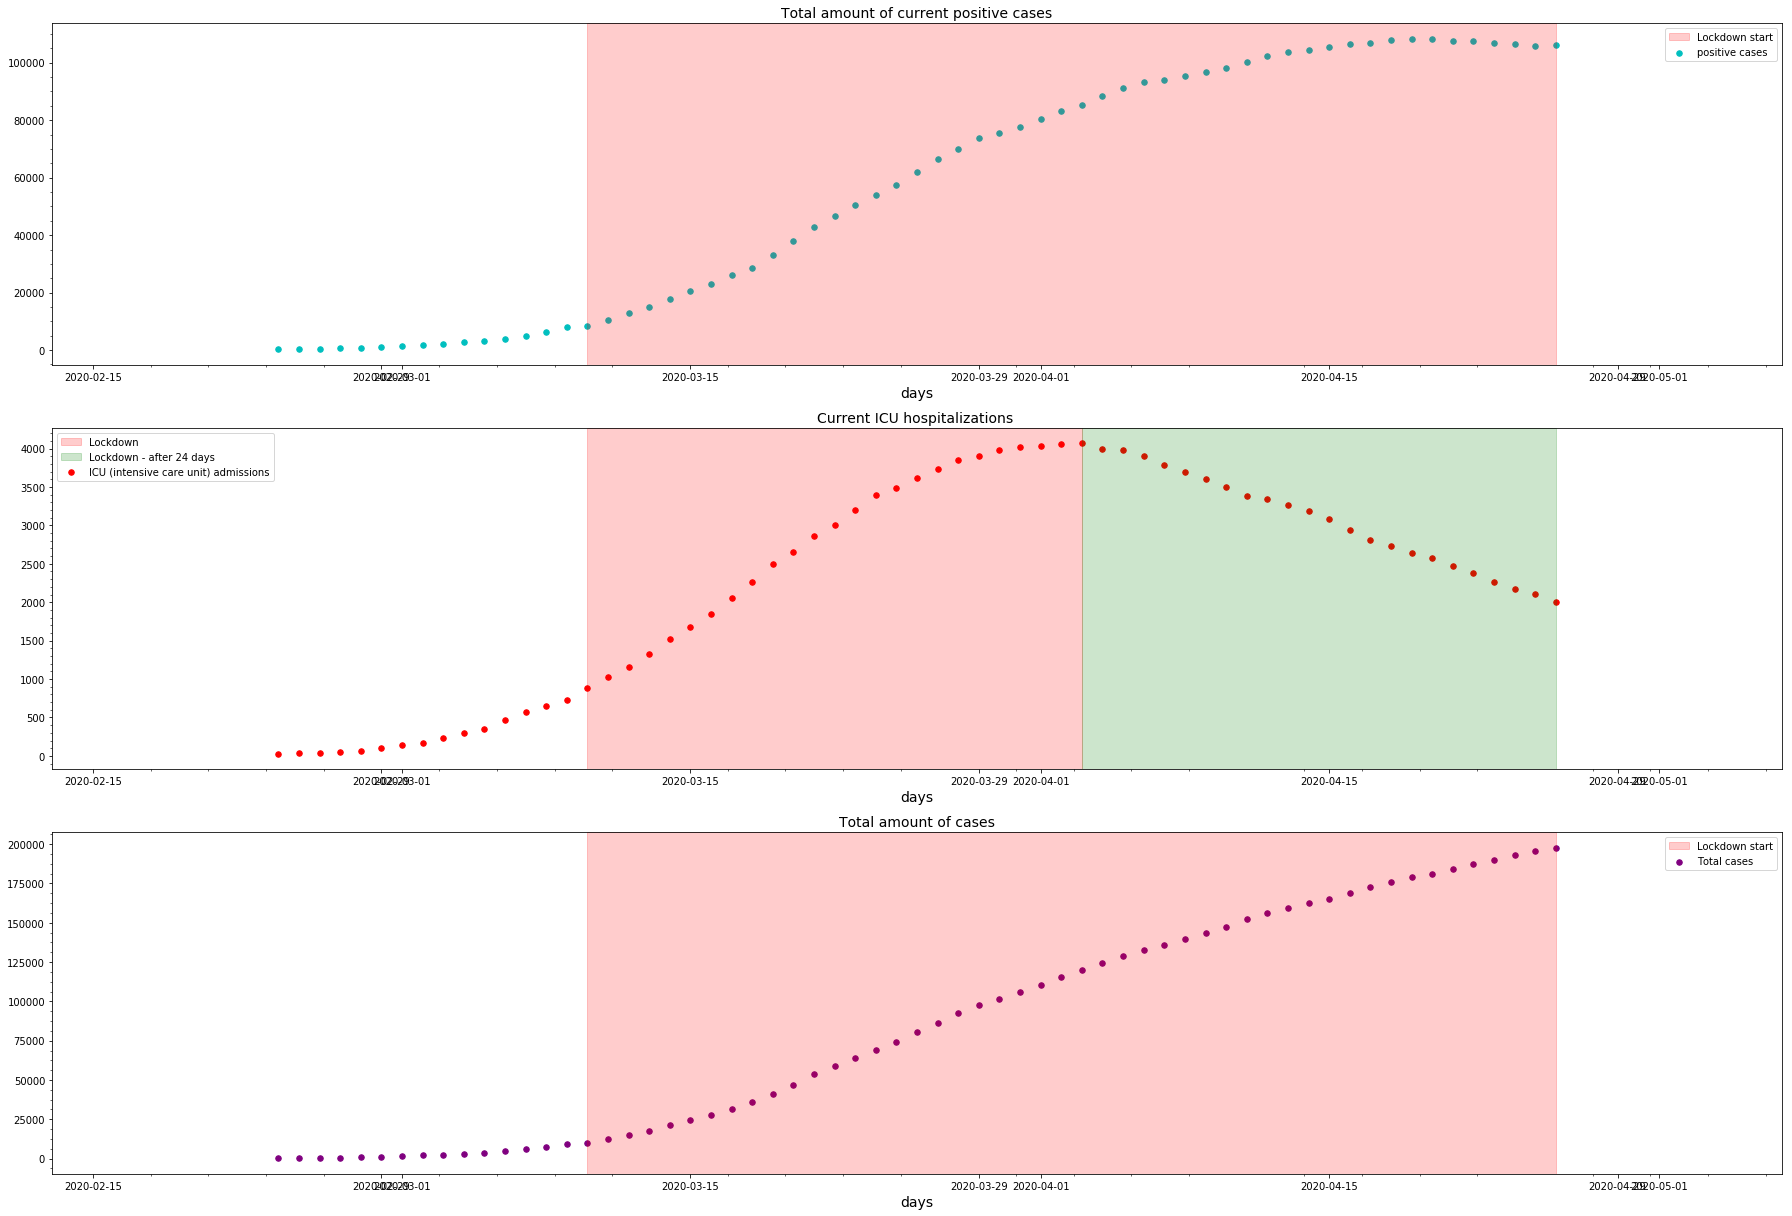

In [11]:
fig = plt.figure(figsize=(25,17))

ax1 = fig.add_subplot(311)
ax1.scatter(date, X_tp_1, label='positive cases', s=30, c='c', marker='o')
ax1.set_title('Total amount of current positive cases', fontsize = 14)
ax1.set_xlabel('days', fontsize = 14)
ax1.axvspan(date[15], date[-1], color='red', alpha=0.2, label =  "Lockdown start")
#ax1.set_yscale('log')
#ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax1.minorticks_on()
ax1.legend()

ax2 = fig.add_subplot(312)
ax2.scatter(date, y_ti_1, label='ICU (intensive care unit) admissions', s=30, c='r', marker='o')
ax2.set_title('Current ICU hospitalizations ', fontsize = 14)
ax2.set_xlabel('days', fontsize = 14)
ax2.axvspan(date[15], date[15+24], color='red', alpha=0.2, label =  "Lockdown")
ax2.axvspan(date[15+24], date[-1], color='green', alpha=0.2, label =  "Lockdown - after 24 days")
#ax1.set_yscale('log')
#ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.minorticks_on()
ax2.legend(loc = 'upper left')

ax3 = fig.add_subplot(313)
ax3.scatter(date, dataframe_andamento_nazionale['totale_casi'], label='Total cases', s=30, c='purple', marker='o')
ax3.set_title('Total amount of cases', fontsize = 14)
ax3.set_xlabel('days', fontsize = 14)
ax3.axvspan(date[15], date[-1], color='red', alpha=0.2, label =  "Lockdown start")
#ax1.set_yscale('log')
#ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax3.minorticks_on()
ax3.legend()








fig.tight_layout()

plt.show()

## Comparison between daily new  ICU hospitalizations and daily new positive cases

In [12]:
ICU_new_cases = []

ICU_data = np.array(dataframe_andamento_nazionale['terapia_intensiva'])

for i in range(ICU_data.size):
    if i == 0:
        continue
    new_cases = ICU_data[i] - ICU_data[i-1]
    ICU_new_cases.append(new_cases)

In [13]:
new_positive_cases = dataframe_andamento_nazionale['nuovi_positivi'].shift(periods = -1)


new_positive_cases.drop(new_positive_cases.tail(1).index,inplace=True)


total_positive_cases = dataframe_andamento_nazionale['totale_positivi'].shift(periods = -1)


total_positive_cases.drop(new_positive_cases.tail(1).index,inplace=True)



In [14]:

total_positive_cases = dataframe_andamento_nazionale['totale_positivi'].shift(periods = -1)


total_positive_cases.drop(new_positive_cases.tail(1).index,inplace=True)




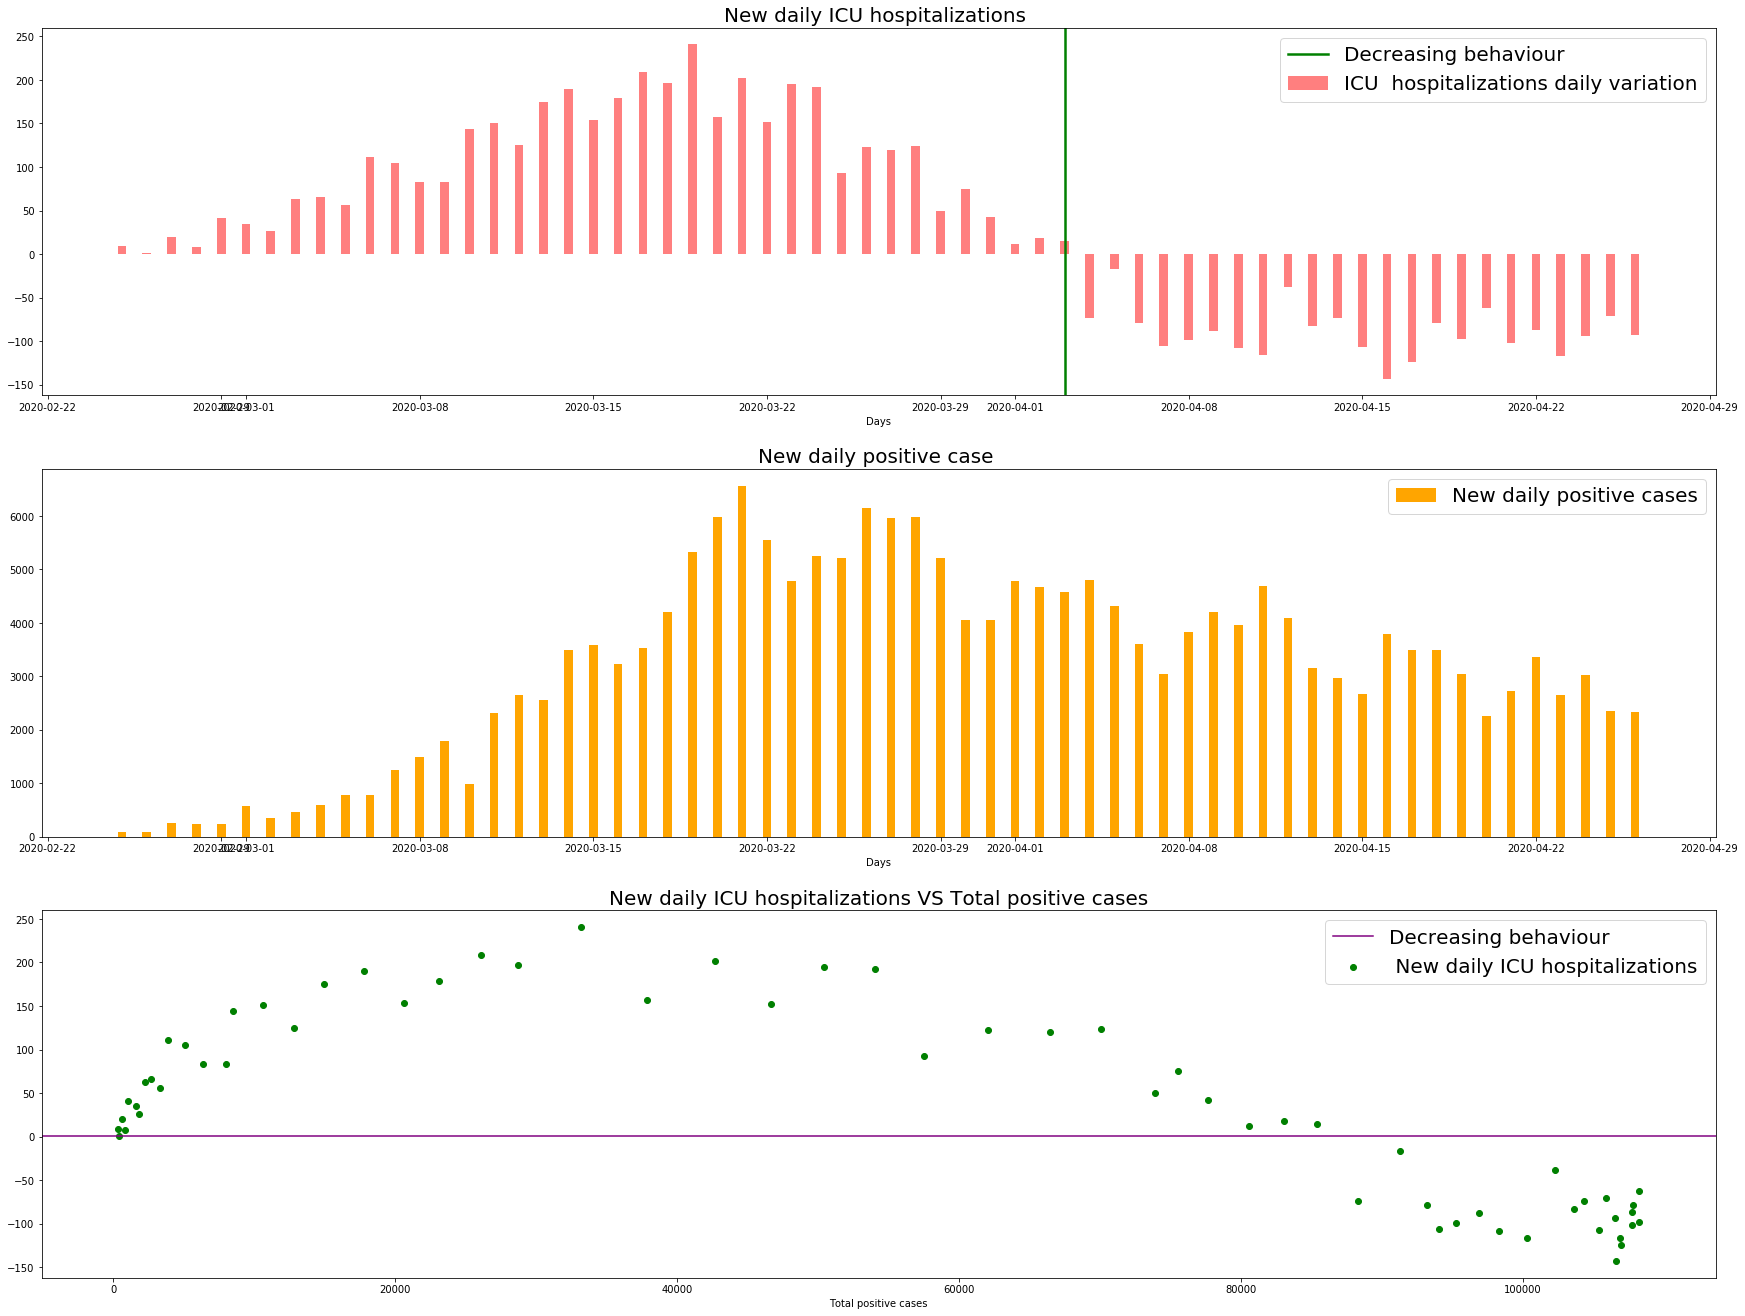

In [15]:
index = date[1:]
bar_width = 0.35

fig =plt.figure(figsize=(30, 23))

ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)
ICU = ax1.bar(index, ICU_new_cases, bar_width,label="ICU  hospitalizations daily variation", color = "r", alpha= 0.5)



new_positive = ax2.bar(index, new_positive_cases.values, bar_width,label="New daily positive cases" , color="orange")


comparison = ax3.scatter(total_positive_cases, ICU_new_cases,  color="green" , label=" New daily ICU hospitalizations")

ax1.axvline(date[15+24], color='green', label =  "Decreasing behaviour" , lw = 2.5)
ax1.set_xlabel('Days')
ax2.set_xlabel('Days')
ax3.set_xlabel('Total positive cases')
ax3.axhline(ICU_new_cases[1], color='purple', label =  "Decreasing behaviour" , lw = 1.5)


ax1.set_title('New daily ICU hospitalizations ', fontsize = 20)
ax2.set_title('New daily positive case ', fontsize = 20)
ax3.set_title('New daily ICU hospitalizations VS Total positive cases', fontsize = 20)

ax1.legend( fontsize = 20)
ax2.legend( fontsize = 20)
ax3.legend( fontsize = 20)
plt.show()

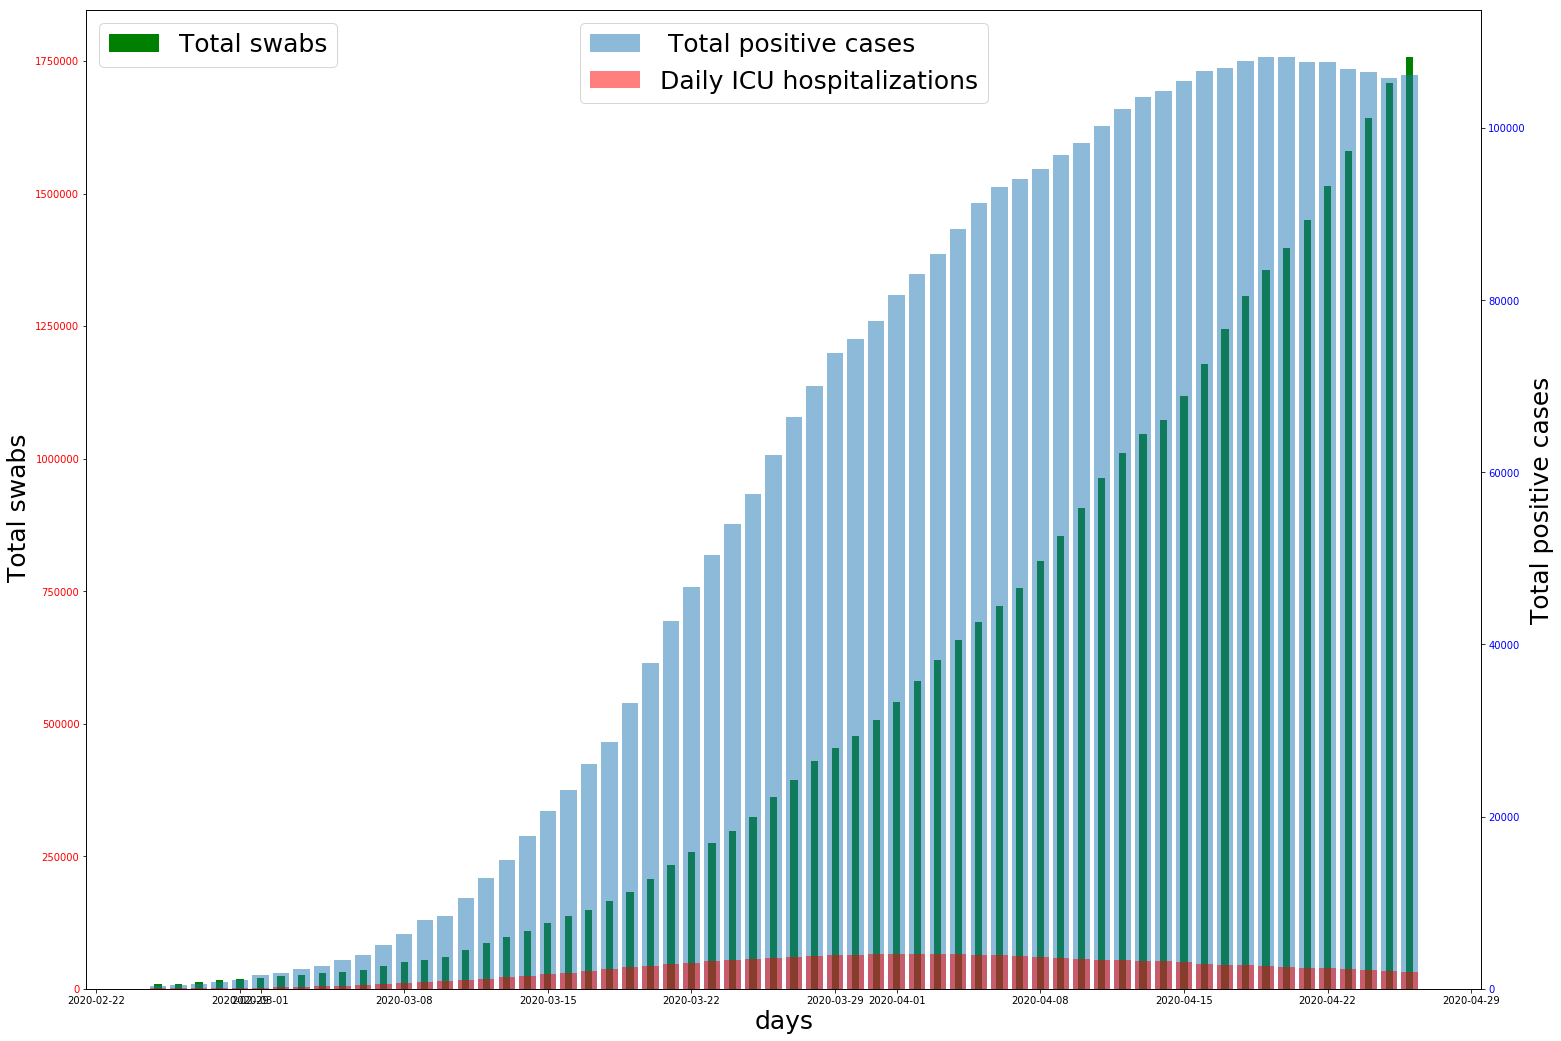

In [16]:

index = date[1:]
bar_width = 0.35

fig =plt.figure(figsize=(25, 18))

ax1 = fig.add_subplot(111)
#ax2 = fig.add_subplot(212)


ax1.bar(index, dataframe_andamento_nazionale['tamponi'].values[1:], bar_width,label = "Total swabs"  , color="green")

ax2 = ax1.twinx()

ax2.bar(index, dataframe_andamento_nazionale['totale_positivi'].values[1:] , alpha= 0.5 , label= " Total positive cases") #iloc: slicing su dataframe

ax2.bar(index, dataframe_andamento_nazionale['terapia_intensiva'].values[1:] , alpha= 0.5 , color = 'r' , label = "Daily ICU hospitalizations") #iloc: slicing su dataframe



color = 'tab:red'
ax1.set_xlabel("days" , fontsize = 25)
ax1.set_ylabel("Total swabs  " , fontsize = 25)

ax1.tick_params(axis='y', labelcolor='r')



color = 'tab:blue'
ax2.set_ylabel("Total positive cases" , fontsize = 25)  # we already handled the x-label with ax1

ax2.tick_params(axis='y', labelcolor='b')

ax2.legend(loc = "upper center",fontsize = 25)
ax1.legend(loc = "upper left",fontsize = 25)

plt.show()



# ICU hospitalizations behaviour w.r.t total cases 

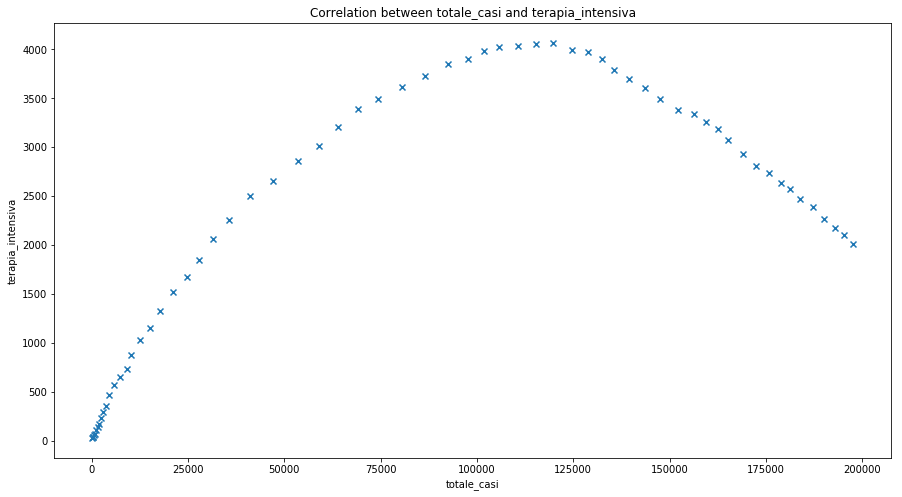

In [17]:
plt.figure(figsize=(15, 8))

features = ['totale_casi']
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = dataframe_andamento_nazionale[col]
    y = dataframe_andamento_nazionale['terapia_intensiva']
    plt.scatter(x, y, marker='x')
    plt.title("Correlation between {} and {}".format(col, 'terapia_intensiva'))
    plt.xlabel(col)
    plt.ylabel('terapia_intensiva')

 # ICU hospitalizations behaviour w.r.t new positive cases

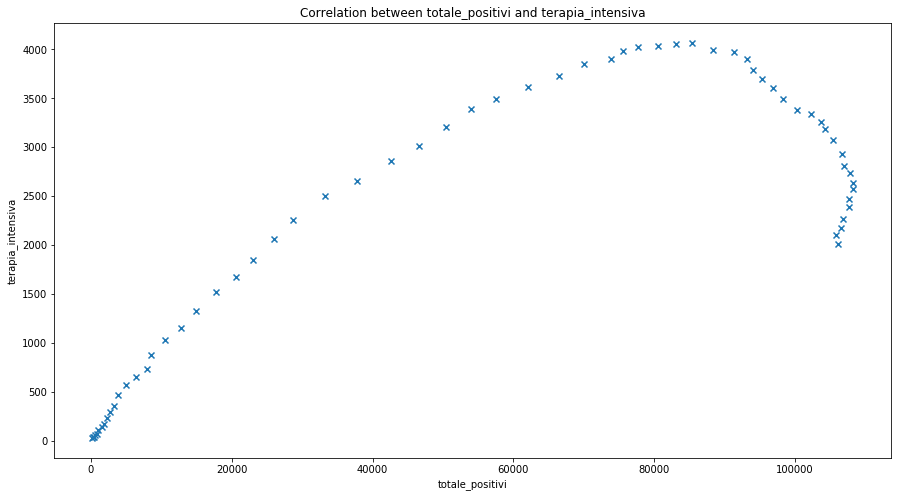

In [18]:
plt.figure(figsize=(15, 8))

features = ['totale_positivi']
for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x = dataframe_andamento_nazionale[col]
    y = dataframe_andamento_nazionale['terapia_intensiva']
    plt.scatter(x, y, marker='x')
    plt.title("Correlation between {} and {}".format(col, 'terapia_intensiva'))
    plt.xlabel(col)
    plt.ylabel('terapia_intensiva')

# Fitting a polynomial model with Univariate polynomial Regression

In [19]:
def normalEquations(X, y):
    start = time.time()
    #theta = np.dot(np.dot(np.linalg.pinv(np.dot(np.transpose(X), X)), np.transpose(X)), y)
    pinv = np.linalg.pinv(X.T.dot(X))
    theta_ne = pinv.dot(X.T).dot(y)
    end = time.time()
    eta_ne = end-start
    return theta_ne.ravel(), eta_ne

In [20]:
def polynomial_features(dataframe, degree):
    dataframe = dataframe.copy()
    variable = dataframe.columns
    for i in range(1, degree):  
        colname = variable + '**%d'%(i+1)
        dataframe[colname] = dataframe[variable]**(i+1)
    return dataframe

In [21]:
variable='totale_positivi'
X_poly = pd.DataFrame(dataframe_andamento_nazionale[variable], columns = [variable])

In [22]:
X_poly_2 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly,  2)]
X_poly_3 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly,  3)]
X_poly_4 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly,  4)]




In [23]:
x = dataframe_andamento_nazionale['totale_positivi']
y = dataframe_andamento_nazionale['terapia_intensiva']

In [24]:
theta_ne_2, _ = normalEquations(X_poly_2, y)
theta_ne_3, _ = normalEquations(X_poly_3, y)
theta_ne_4, _ = normalEquations(X_poly_4, y)

#y_2 = X_poly_2.dot(theta_ne_2)
#y_3 = X_poly_3.dot(theta_ne_3)
#y_4 = X_poly_4.dot(theta_ne_4)



In [25]:
srt_zip_2 = sorted(zip(dataframe_andamento_nazionale['totale_positivi'], X_poly_2.dot(theta_ne_2)))
X_2, yhat_2 = zip(*srt_zip_2)



srt_zip_3 = sorted(zip(dataframe_andamento_nazionale['totale_positivi'], X_poly_3.dot(theta_ne_3)))
X_3, yhat_3 = zip(*srt_zip_3)



srt_zip_4 = sorted(zip(dataframe_andamento_nazionale['totale_positivi'], X_poly_4.dot(theta_ne_4)))
X_4, yhat_4 = zip(*srt_zip_4)




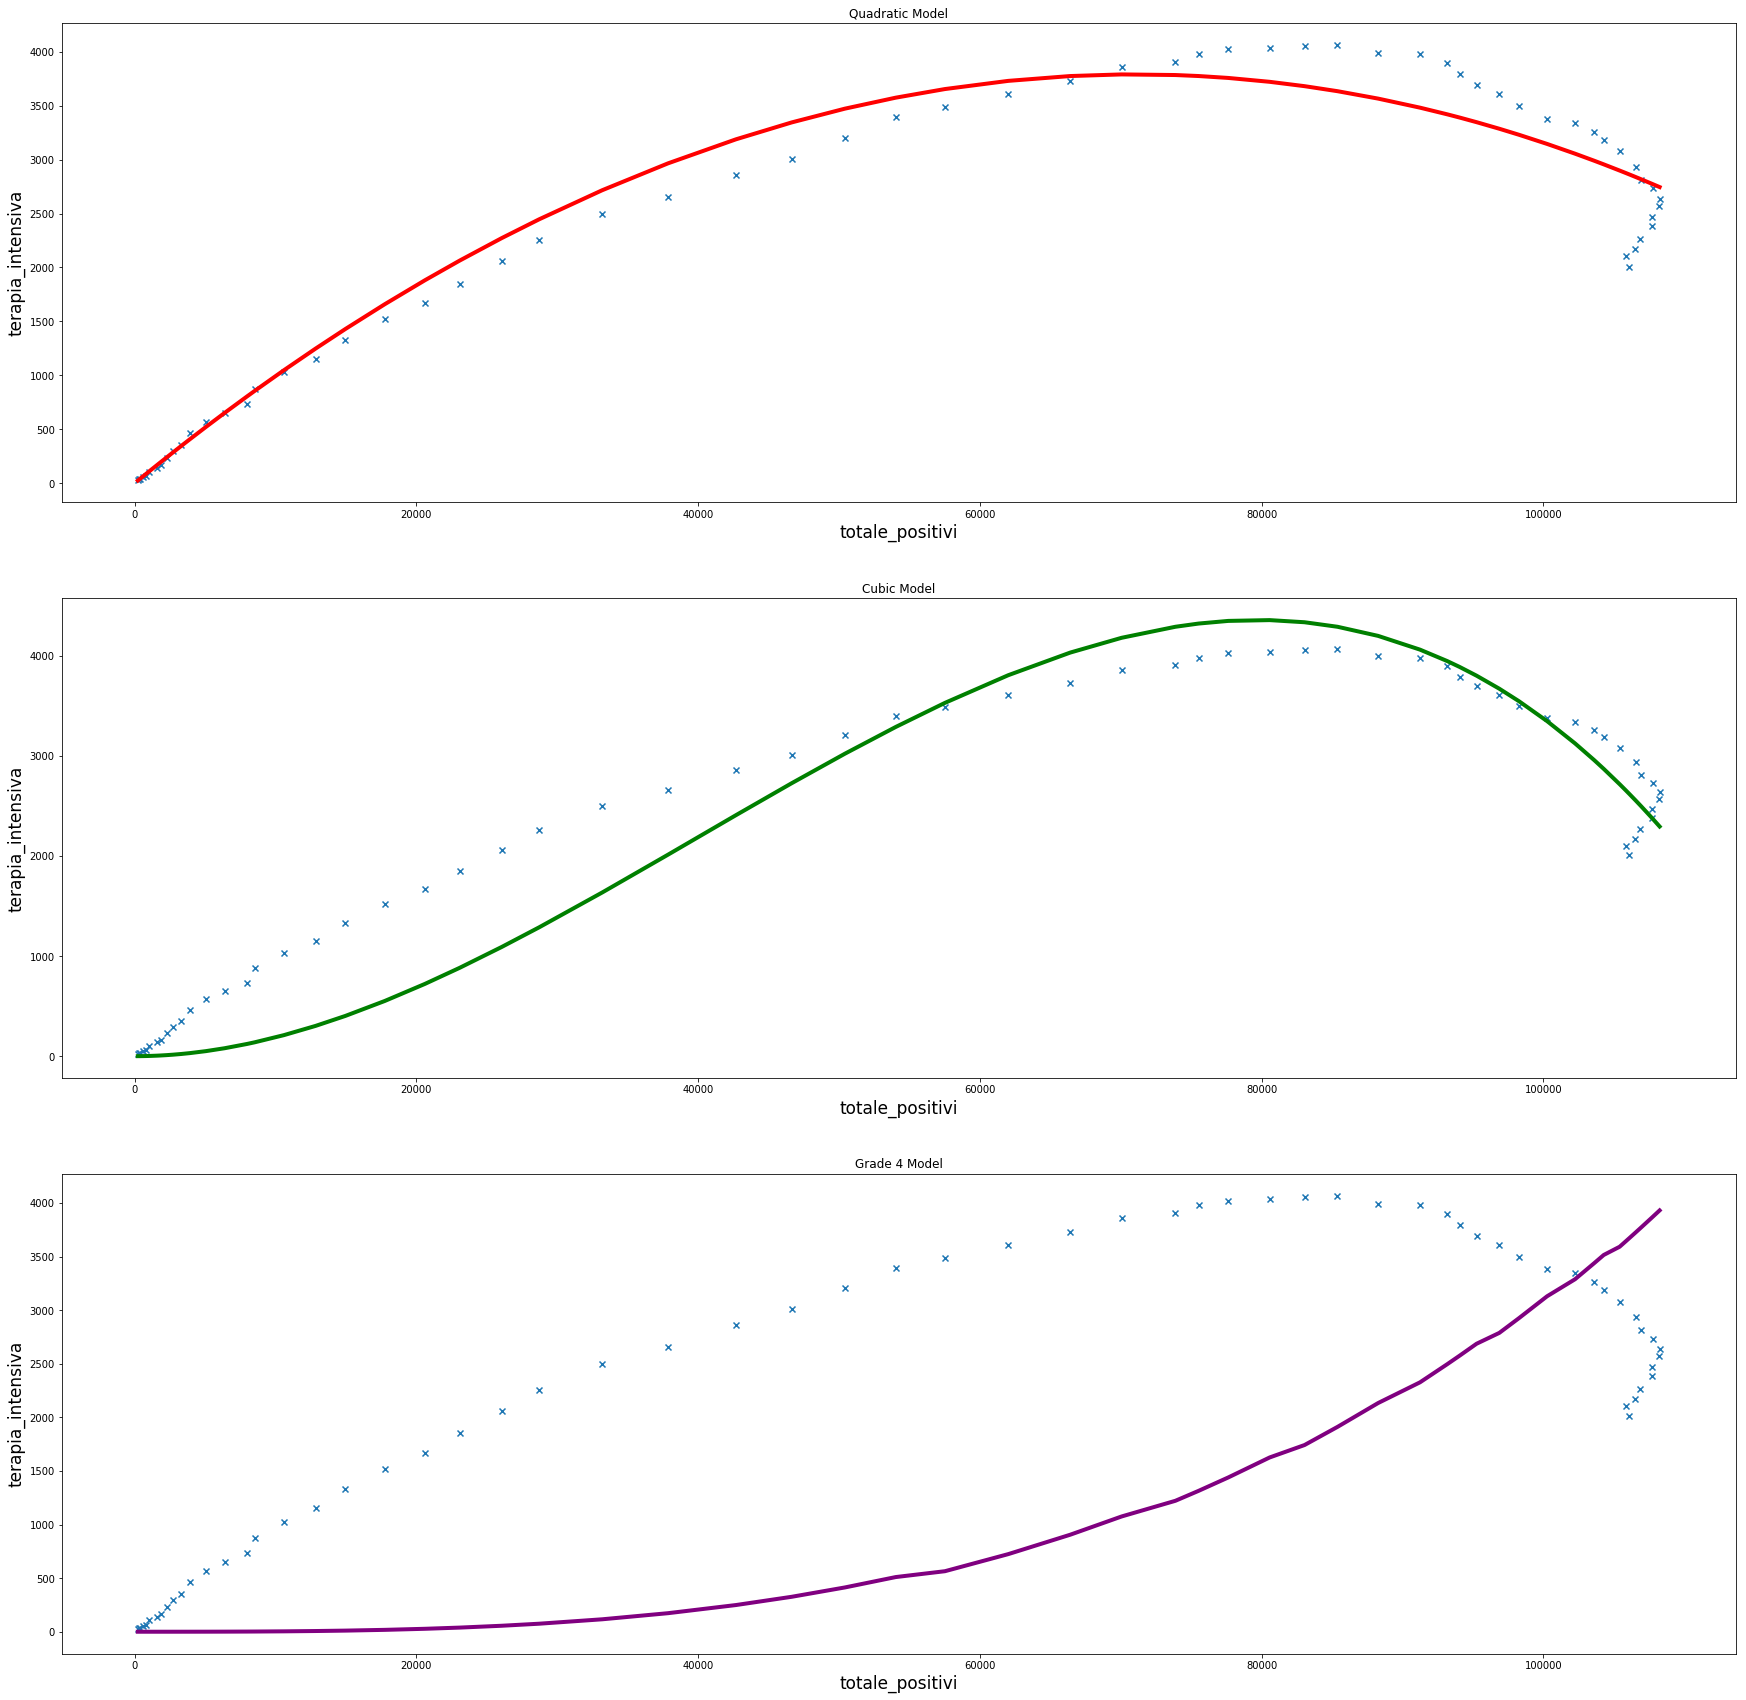

In [26]:
fig=plt.figure(figsize= (30,30))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3= fig.add_subplot(313)




ax1.scatter(x, y, marker='x')
ax1.plot(X_2, yhat_2, c = 'r', linewidth=4)
#ax1.title("Linear Regression model")



ax2.scatter(x, y, marker='x')
ax2.plot(X_3, yhat_3, c = 'g', linewidth=4)


ax3.scatter(x ,  y, marker='x')
ax3.plot(X_4, yhat_4, c = 'purple', linewidth=4)




ax1.title.set_text('Quadratic Model')

ax2.title.set_text('Cubic Model')

ax3.title.set_text('Grade 4 Model')




for ax in fig.axes:
    ax.set_xlabel(r'totale_positivi', fontsize=17)
    ax.set_ylabel(r'terapia_intensiva', fontsize=17)



# Using Regularization

In [27]:
def computeCostVectorizedReg(X, y, theta , lambda_reg = 0.0 ):
    m = y.size

    start = time.time()
    h = X.dot(theta)
    
    # vectorized implementation
    J = (1/(2*m))*((h-y).T.dot(h-y)) + (lambda_reg/(2*m))*(theta[1:].T.dot(theta[1:]))
    end = time.time()
    eta = end-start
    return J[0][0], eta 

In [28]:
def gradientDescentVectorizedReg(X, y,theta, lambda_reg = 0.0, alpha=0.01, num_iters=1500, early = False):
    m = y.size
    J_history = np.zeros(num_iters)
    
    start = time.time()
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        
        # ! simoultaneusly update all the parameters 
        # vectorized implementation
       
        theta = theta - (alpha*(1/m)*(X.T.dot(h-y)) + ((alpha*lambda_reg)/m) * np.r_[[[0]], theta[1:].reshape(-1,1)])
        J_history[iter], _ = computeCostVectorizedReg(X, y, theta ,lambda_reg )
        
        # early stopping
        if (early == True) & (J_history[iter] == J_history[iter-1]):
            break
            
    end = time.time()
    eta = end - start
    return(theta.ravel(), J_history[J_history != 0], eta)

In [29]:
def featureScaling(X):
    X_scaled = X
    
    mu = np.mean(X, axis = 0)
    sigma = np.std(X, axis = 0)
    maxima = np.amax(X, axis = 0)
    minima = np.amin(X, axis = 0)
    
    for j in range(X.shape[1]):
        X_scaled[:,j] = (X[:,j]-mu[j])/sigma[j]
        #X_scaled[:,j] = (X[:,j]-mu[j])/(maxima[j] - minima[j])
    
    return X_scaled, mu, sigma, maxima, minima

In [30]:
X_scaled_poly_2, mu_poly_2, sigma_poly_2, maxima_poly_2, minima_poly_2 = featureScaling(X_poly_2[:,1:])
X_scaled_poly_3, mu_poly_3, sigma_poly_3, maxima_poly_3, minima_poly_3 = featureScaling(X_poly_3[:,1:])
X_scaled_poly_4, mu_poly_4, sigma_poly_4, maxima_poly_4, minima_poly_4 = featureScaling(X_poly_4[:,1:])

X_scaled_poly_2 = np.c_[np.ones((X_scaled_poly_2.shape[0], 1)), X_scaled_poly_2]
X_scaled_poly_3 = np.c_[np.ones((X_scaled_poly_3.shape[0], 1)), X_scaled_poly_3]
X_scaled_poly_4 = np.c_[np.ones((X_scaled_poly_4.shape[0], 1)), X_scaled_poly_4]



In [31]:
lambda_reg = 0.1
alpha = 0.01
num_iters = 10000
early = True

theta_poly_2 = np.zeros((X_scaled_poly_2.shape[1], 1))
theta_poly_3 = np.zeros((X_scaled_poly_3.shape[1], 1))
theta_poly_4 = np.zeros((X_scaled_poly_4.shape[1], 1))

theta_poly_2_opt, _, _ = gradientDescentVectorizedReg(X_scaled_poly_2, np.array(y).reshape(-1,1),  theta_poly_2 , lambda_reg = lambda_reg, alpha=alpha, num_iters=num_iters, early = early)
theta_poly_3_opt, _, _ = gradientDescentVectorizedReg(X_scaled_poly_3, np.array(y).reshape(-1,1),  theta_poly_3 , lambda_reg = lambda_reg,  alpha=alpha, num_iters=num_iters, early = early)
theta_poly_4_opt, _, _ = gradientDescentVectorizedReg(X_scaled_poly_4, np.array(y).reshape(-1,1),  theta_poly_4,  lambda_reg = lambda_reg,  alpha=alpha, num_iters=num_iters, early = early)



In [32]:
lambda_reg = 0.0
alpha = 0.01
num_iters = 10000
early = True

theta_poly_2 = np.zeros((X_scaled_poly_2.shape[1], 1))
theta_poly_3 = np.zeros((X_scaled_poly_3.shape[1], 1))
theta_poly_4 = np.zeros((X_scaled_poly_4.shape[1], 1))

theta_poly_2_wr, _, _ = gradientDescentVectorizedReg(X_scaled_poly_2, np.array(y).reshape(-1,1),  theta_poly_2 , lambda_reg = lambda_reg, alpha=alpha, num_iters=num_iters, early = early)
theta_poly_3_wr, _, _ = gradientDescentVectorizedReg(X_scaled_poly_3, np.array(y).reshape(-1,1),  theta_poly_3 , lambda_reg = lambda_reg,  alpha=alpha, num_iters=num_iters, early = early)
theta_poly_4_wr, _, _ = gradientDescentVectorizedReg(X_scaled_poly_4, np.array(y).reshape(-1,1),  theta_poly_4,  lambda_reg = lambda_reg,  alpha=alpha, num_iters=num_iters, early = early)




In [33]:
srt_zip_2 = sorted(zip(dataframe_andamento_nazionale['totale_positivi'], X_scaled_poly_2.dot(theta_poly_2_opt)))
X_2_r, yhat_2_r = zip(*srt_zip_2)



srt_zip_3 = sorted(zip(dataframe_andamento_nazionale['totale_positivi'], X_scaled_poly_3.dot(theta_poly_3_opt)))
X_3_r, yhat_3_r = zip(*srt_zip_3)


srt_zip_4 = sorted(zip(dataframe_andamento_nazionale['totale_positivi'], X_scaled_poly_4.dot(theta_poly_4_opt)))
X_4_r, yhat_4_r = zip(*srt_zip_4)






In [34]:
srt_zip_2_wr = sorted(zip(dataframe_andamento_nazionale['totale_positivi'], X_scaled_poly_2.dot(theta_poly_2_wr)))
X_2_wr, yhat_2_wr = zip(*srt_zip_2_wr)



srt_zip_3_wr = sorted(zip(dataframe_andamento_nazionale['totale_positivi'], X_scaled_poly_3.dot(theta_poly_3_wr)))
X_3_wr, yhat_3_wr = zip(*srt_zip_3_wr)


srt_zip_4_wr = sorted(zip(dataframe_andamento_nazionale['totale_positivi'], X_scaled_poly_4.dot(theta_poly_4_wr)))
X_4_wr, yhat_4_wr = zip(*srt_zip_4_wr)



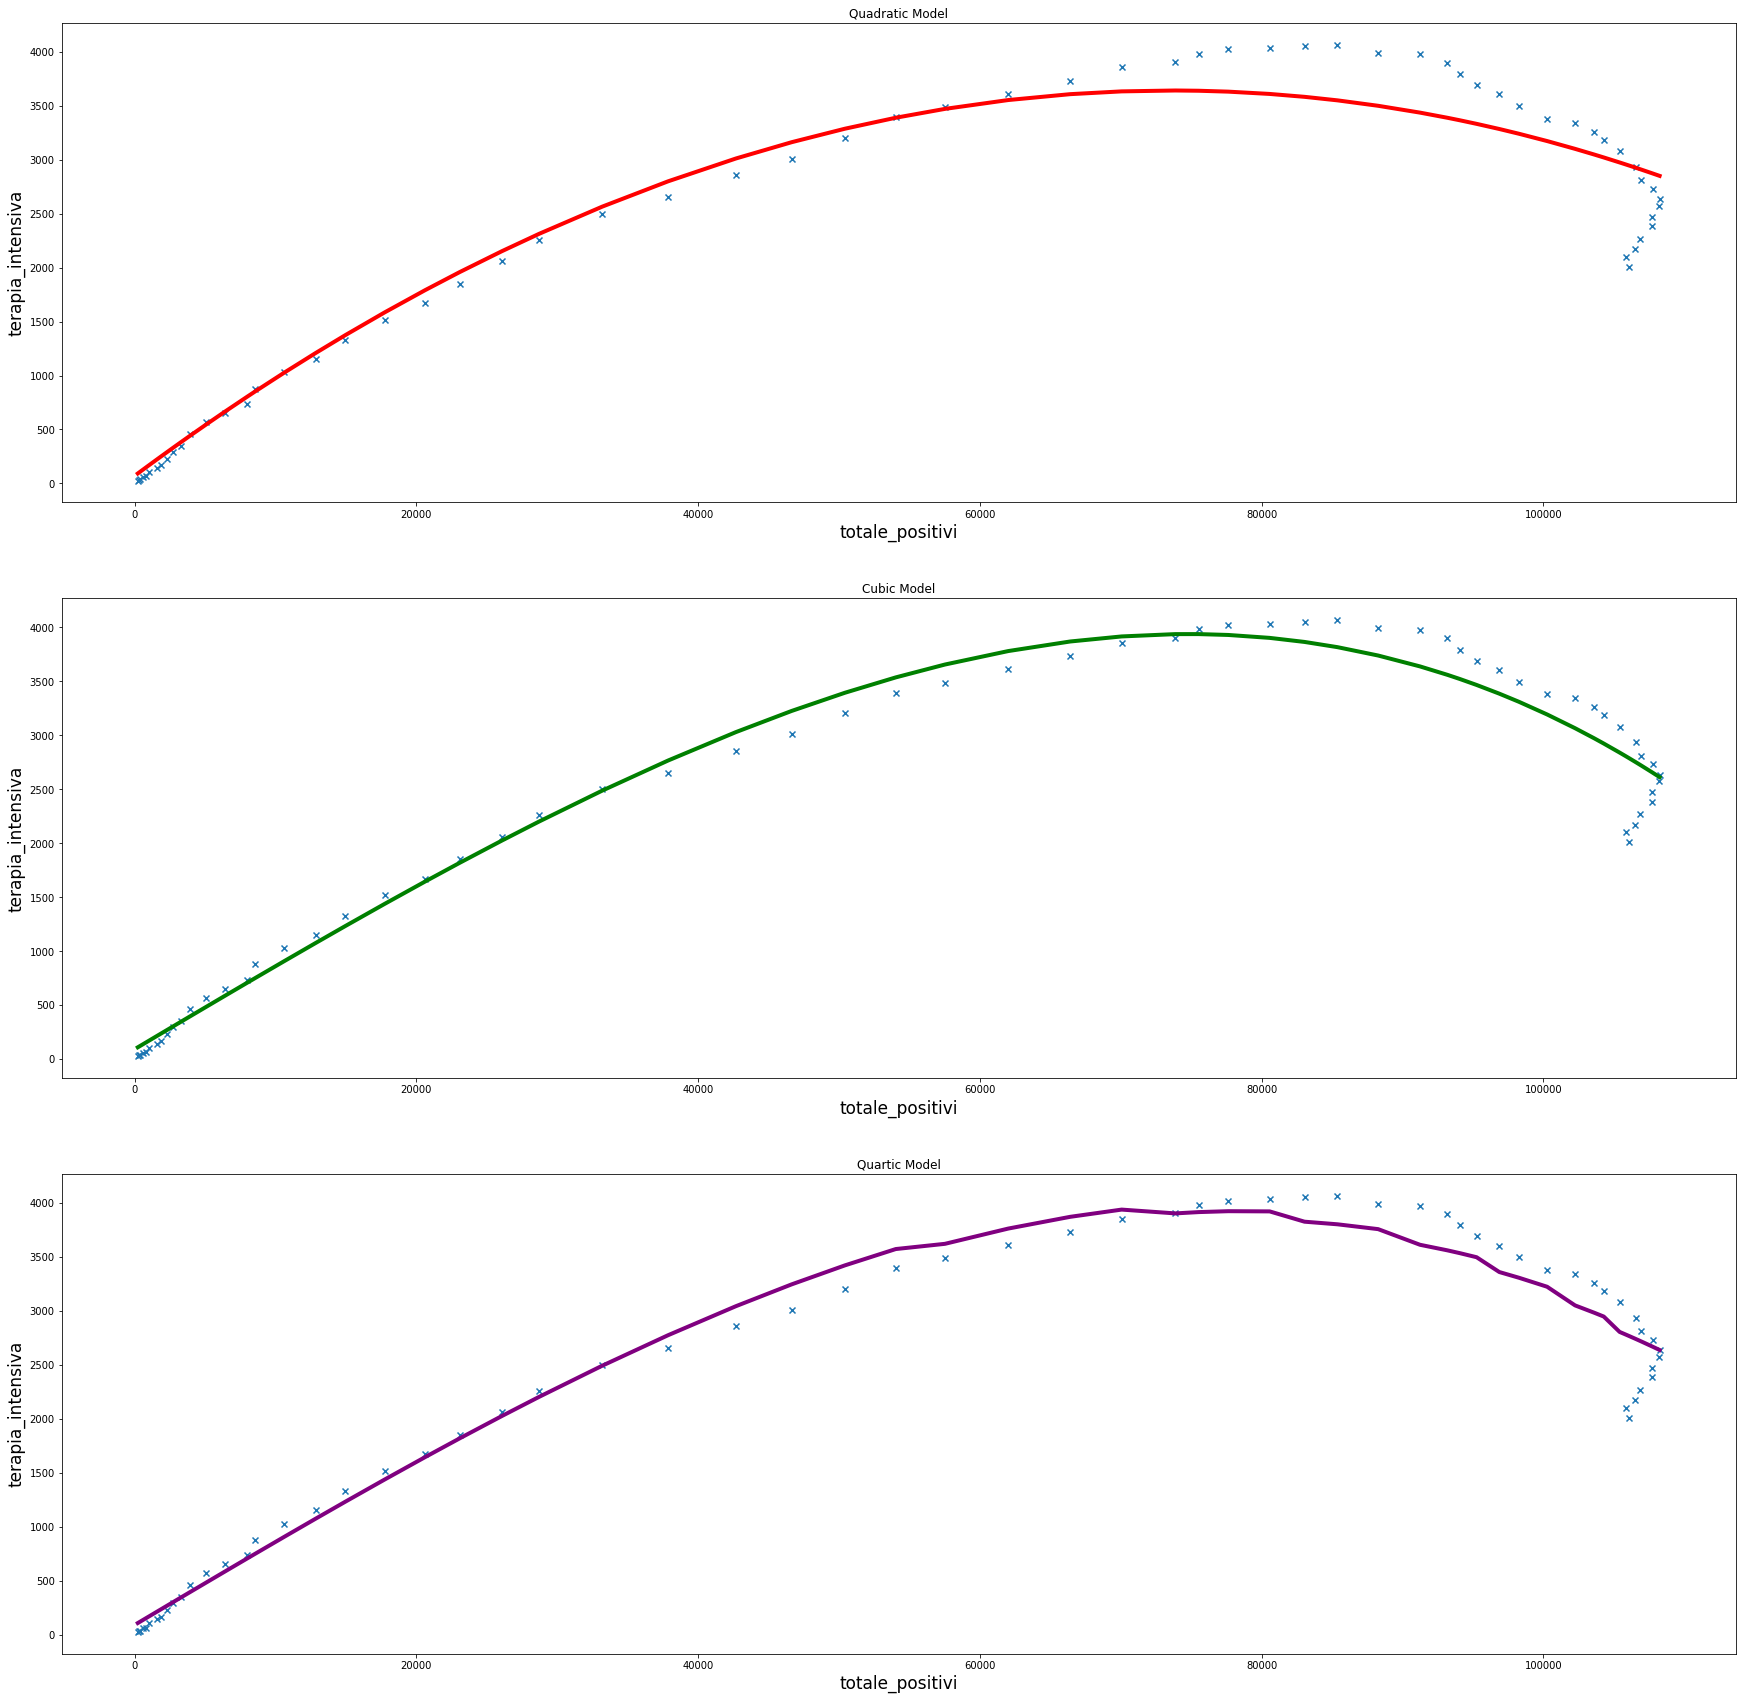

In [35]:
fig=plt.figure(figsize= (30,30))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)




ax1.scatter(x, y, marker='x')
ax1.plot(X_2_r ,  yhat_2_r, c = 'r', linewidth=4)
#ax1.title("Linear Regression model")



ax2.scatter(x, y, marker='x')
ax2.plot(X_3_r, yhat_3_r, c = 'g', linewidth=4)


ax3.scatter(x, y, marker='x')
ax3.plot(X_4_r, yhat_4_r, c = 'purple', linewidth=4)



ax1.title.set_text('Quadratic Model')

ax2.title.set_text('Cubic Model')

ax3.title.set_text('Quartic Model')






for ax in fig.axes:
    ax.set_xlabel(r'totale_positivi', fontsize=17)
    ax.set_ylabel(r'terapia_intensiva', fontsize=17)

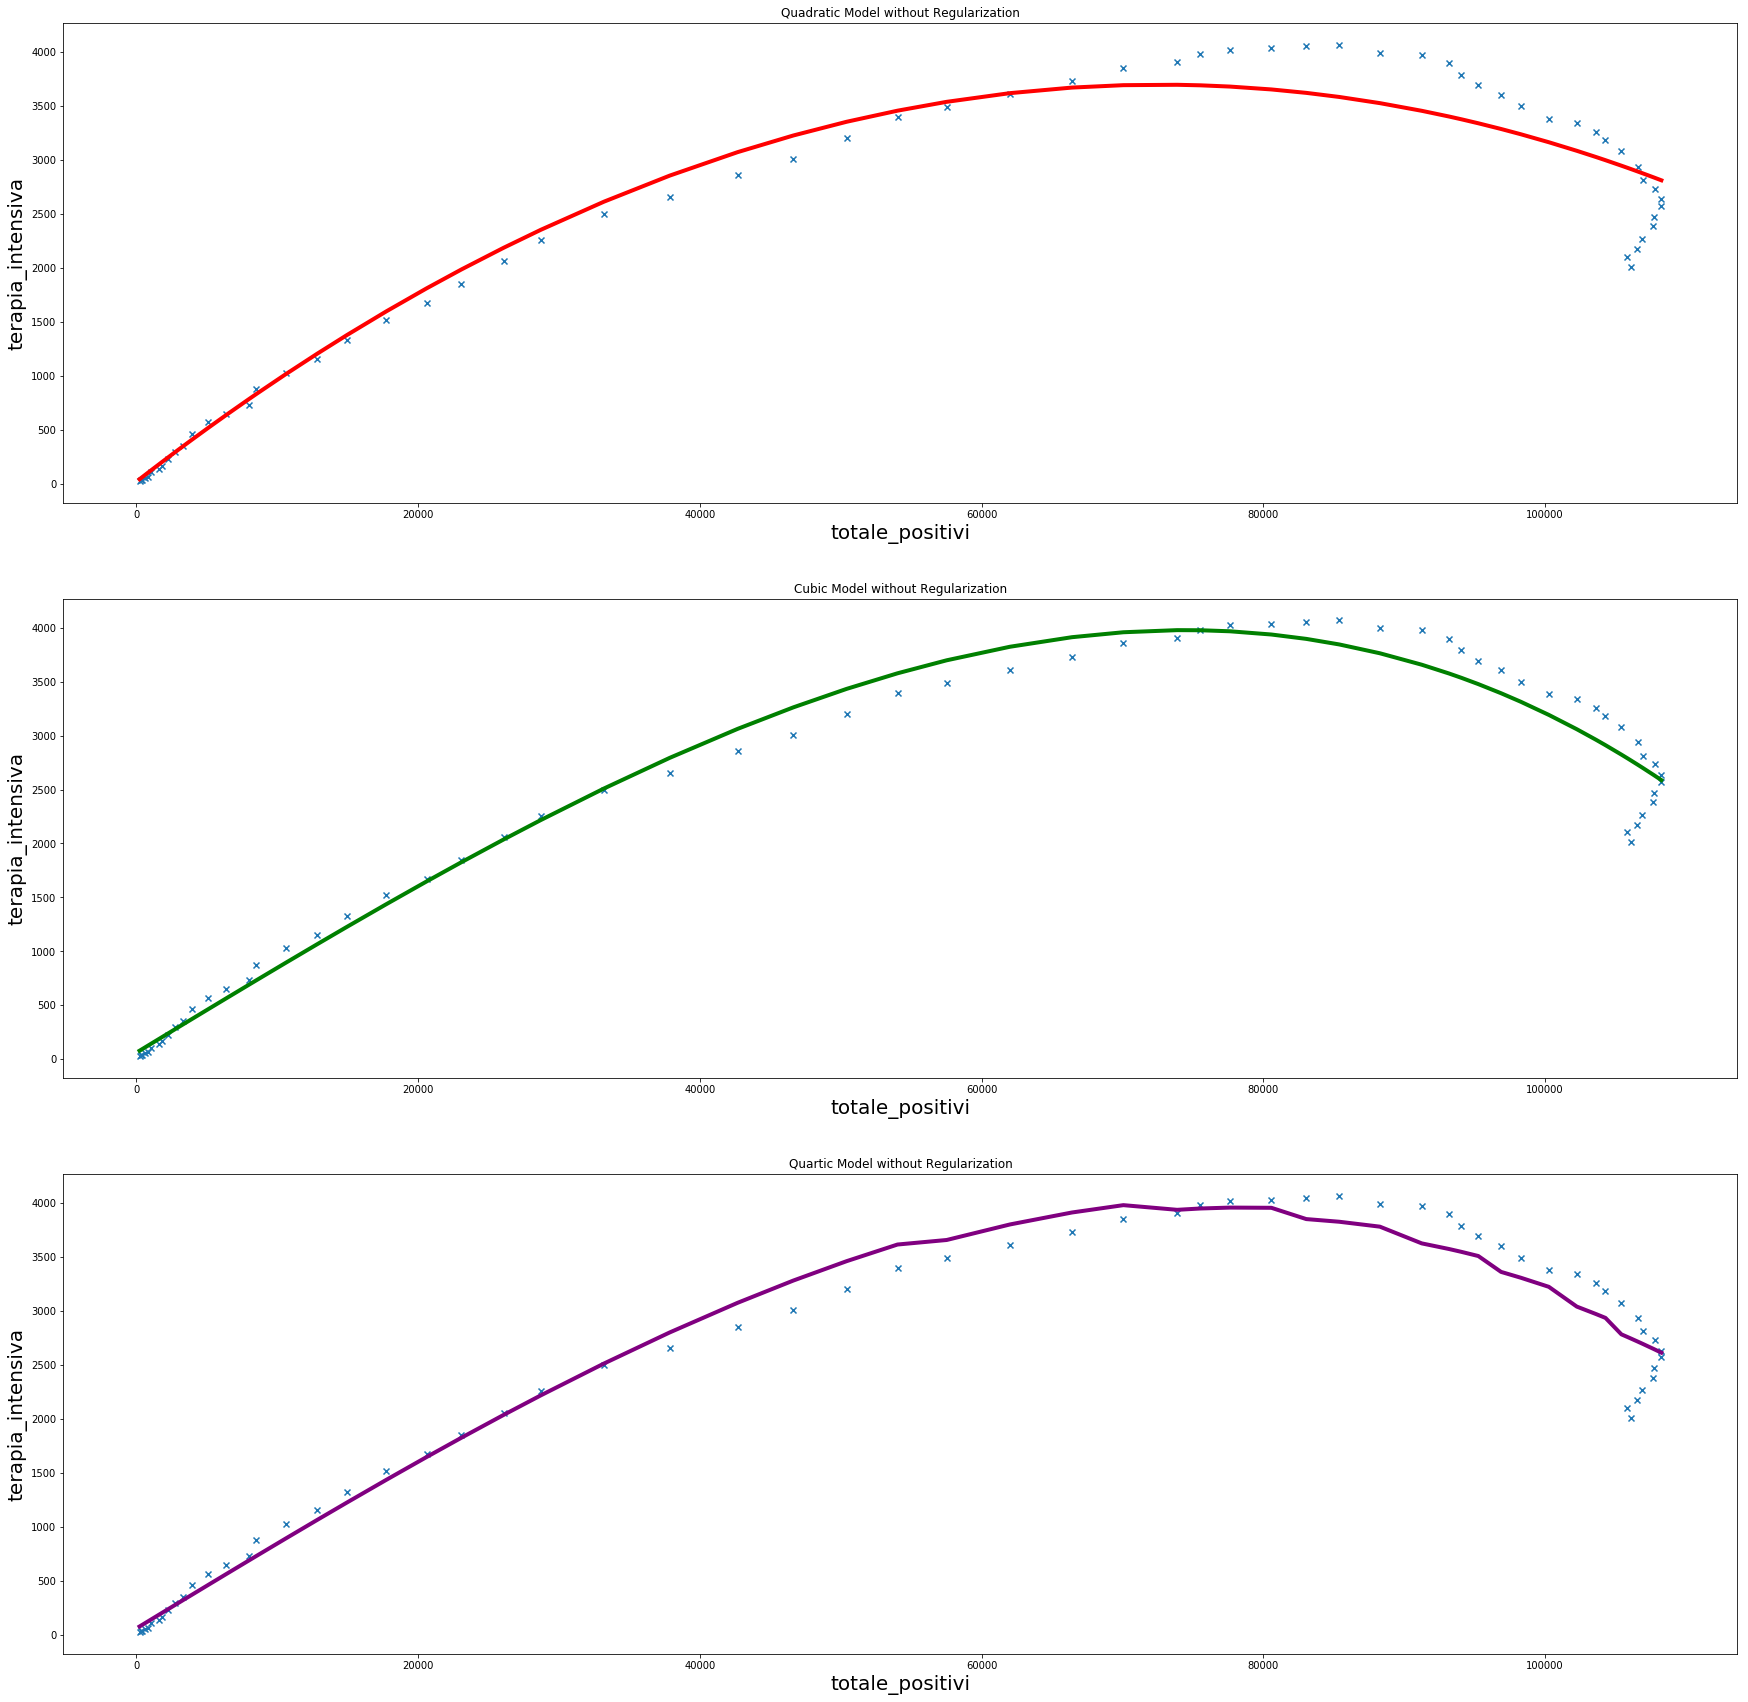

In [36]:
fig=plt.figure(figsize= (30,30))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3 = fig.add_subplot(313)




ax1.scatter(x, y, marker='x')
ax1.plot(X_2_wr ,  yhat_2_wr, c = 'r', linewidth=4)
#ax1.title("Linear Regression model")



ax2.scatter(x, y, marker='x')
ax2.plot(X_3_wr, yhat_3_wr, c = 'g', linewidth=4)


ax3.scatter(x, y, marker='x')
ax3.plot(X_4_wr, yhat_4_wr, c = 'purple', linewidth=4)



ax1.title.set_text('Quadratic Model without Regularization')

ax2.title.set_text('Cubic Model without Regularization')

ax3.title.set_text('Quartic Model without Regularization')






for ax in fig.axes:
    ax.set_xlabel(r'totale_positivi', fontsize=20)
    ax.set_ylabel(r'terapia_intensiva', fontsize=20)

In [37]:


print("Theta (2nd order case) with Normal Equations: {}".format(theta_ne_2))
print("Theta (3rd order case) with Normal Equations: {}".format(theta_ne_3))
print("Theta (4th order case) with Normal Equations: {}".format(theta_ne_4))

print("\n")

print("Theta (2nd order case) with GD: {}".format(theta_poly_2_opt))
print("Theta (3rd order case) with GD: {}".format(theta_poly_3_opt))
print("Theta (4th order case) with GD: {}".format(theta_poly_4_opt))

print("\n")

print("Theta (2nd order case) with GD and without Regularizarion: {}".format(theta_poly_2_wr))
print("Theta (3rd order case) with GD and without Regularizarion: {}".format(theta_poly_3_wr))
print("Theta (4th order case) with GD and without Regularizarion: {}".format(theta_poly_4_wr))




Theta (2nd order case) with Normal Equations: [ 3.97279806e-06  1.06828433e-01 -7.52500184e-07]
Theta (3rd order case) with Normal Equations: [ 1.10892534e-15  5.21218298e-11  2.05403016e-06 -1.71654457e-11]
Theta (4th order case) with Normal Equations: [3.04793593e-27 2.93471339e-22 3.04319015e-17 3.07960003e-12
 2.85717706e-18]


Theta (2nd order case) with GD: [ 2283.06349206  4075.60822961 -3071.10826055]
Theta (3rd order case) with GD: [ 2283.06349206  3251.77693639   -28.12221169 -2273.32528381]
Theta (4th order case) with GD: [ 2283.06349206  3252.95951742   -27.09881821 -2279.26277928
    17.20369479]


Theta (2nd order case) with GD and without Regularizarion: [ 2283.06349206  4255.9232922  -3250.61625987]
Theta (3rd order case) with GD and without Regularizarion: [ 2283.06349206  3324.37585076   -30.15507265 -2342.97332283]
Theta (4th order case) with GD and without Regularizarion: [ 2283.06349206  3325.69153423   -28.82287698 -2349.76058555
    19.06316804]


## Fitting a quadratic model considering ICU_hospitalizations (target) and total cases.

In [38]:
theta_ne_2 #modello

array([ 3.97279806e-06,  1.06828433e-01, -7.52500184e-07])

In [39]:
variable='totale_casi'
X_poly = pd.DataFrame(dataframe_andamento_nazionale[variable], columns = [variable])
X_poly_2 = np.c_[np.ones((X_poly.shape[0], 1)), polynomial_features(X_poly,  2)]


In [40]:
x_tc = dataframe_andamento_nazionale['totale_casi']
variable='totale_casi'
tc_poly = pd.DataFrame(dataframe_andamento_nazionale[variable], columns = [variable])
tc_poly_2 = np.c_[np.ones((tc_poly.shape[0], 1)), polynomial_features(tc_poly,  2)]

theta_ne_2_tc , _ = normalEquations(tc_poly_2, y)
srt_tc_zip_2 = sorted(zip(dataframe_andamento_nazionale['totale_casi'], tc_poly_2.dot(theta_ne_2_tc)))
X_2_tc, yhat_2_tc = zip(*srt_tc_zip_2)



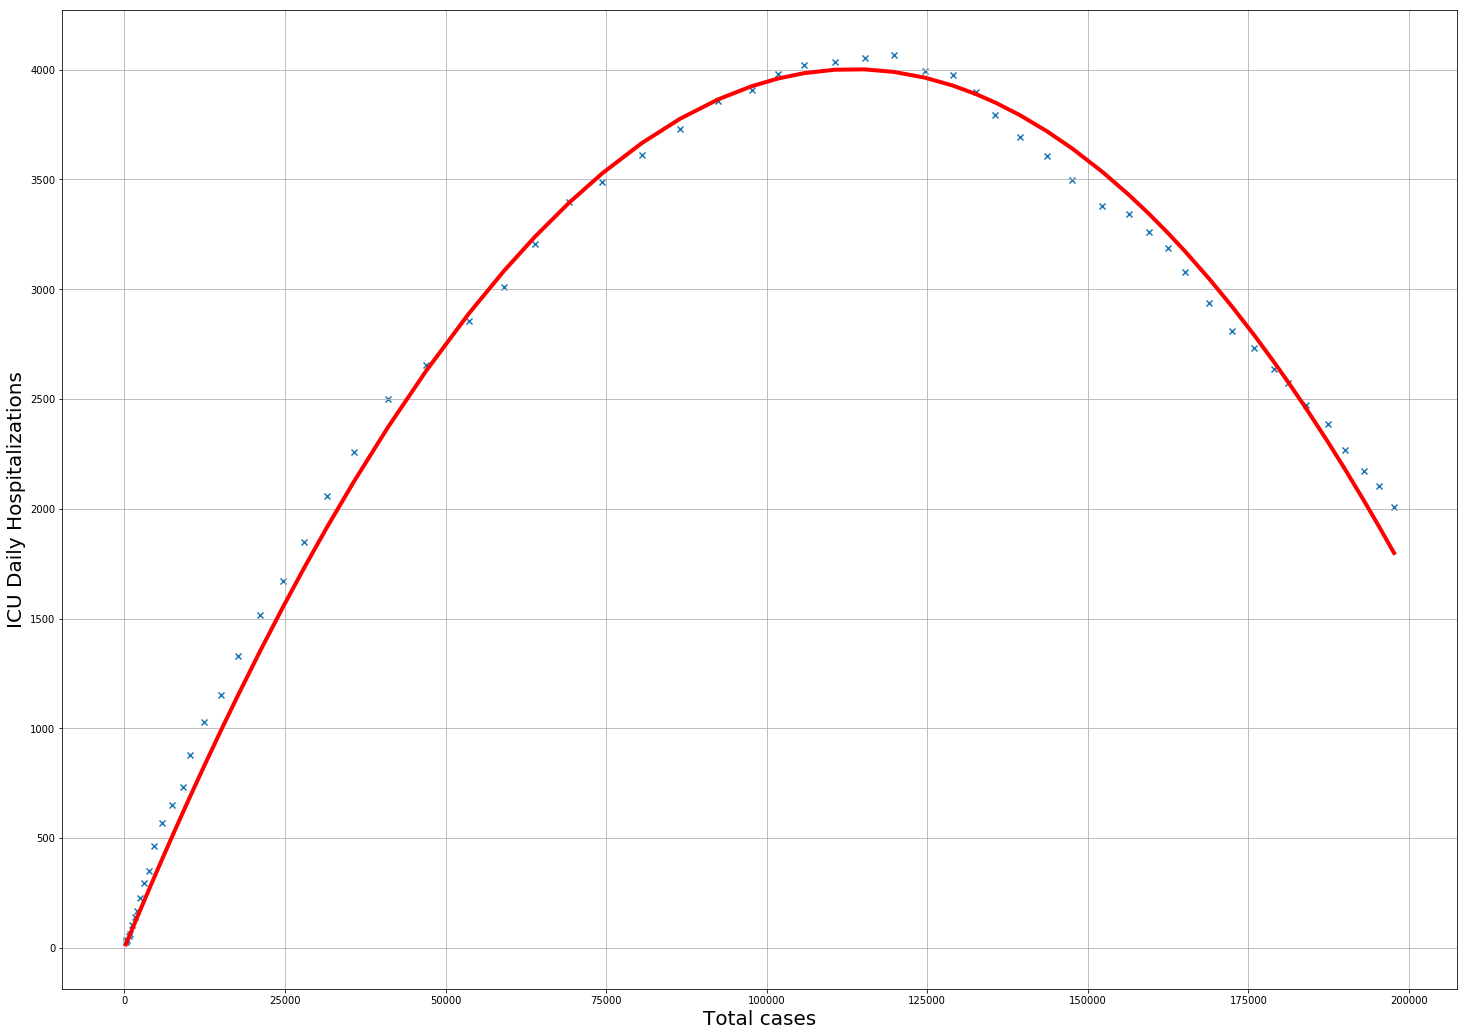

In [41]:
fig = plt.figure(figsize= (25,18))
plt.scatter(x_tc, y, marker='x')
plt.plot(X_2_tc, yhat_2_tc, c = 'r', linewidth=4)
plt.xlabel("Total cases", fontsize=20)
plt.ylabel("ICU Daily Hospitalizations", fontsize=20)
plt.grid()
plt.show()

# Inference
Using this model , we can try to predict the 0 level for ICU hospitalitations.

In [42]:
def inference_ne_tc (theta , x ): 
    y = theta[0] + theta[1]* x + theta[2]* x**2
    return y

In [43]:
future_data = [150000 ,200500, 201000 , 202000, 202500, 204000, 205000 , 210000 , 220000 , 225000, 226000 , 226947 ]




predictions = []

w = 0

for i in future_data:
     
    p = inference_ne_tc(theta_ne_2_tc ,i)
    if p >= 0:
        w = w+1
    predictions.append(p)


## Predictions

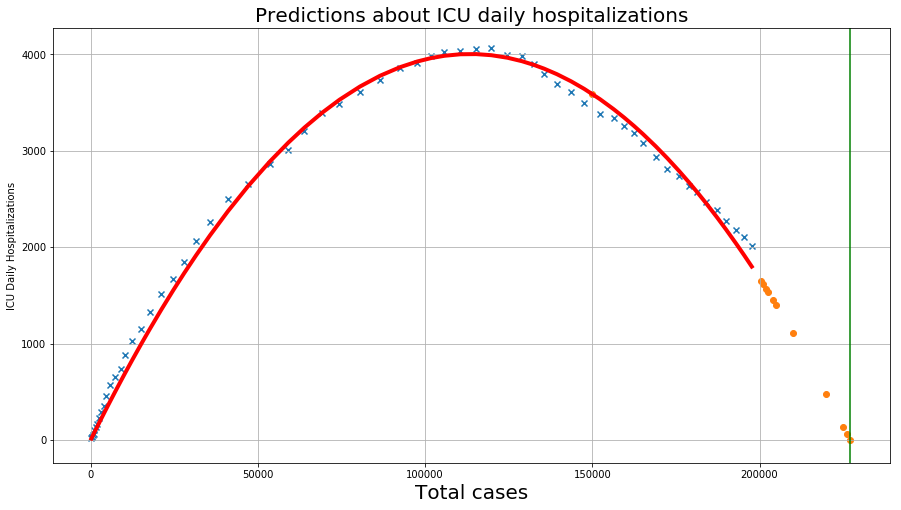

In [44]:
fig = plt.figure(figsize= (15,8))
plt.scatter(x_tc, y, marker='x')
plt.plot(X_2_tc,yhat_2_tc, c = 'r', linewidth=4)
plt.scatter(future_data , predictions , marker = "o")
plt.grid()
plt.axvline(future_data[w],  c='g')
plt.xlabel("Total cases", fontsize=20)
plt.ylabel("ICU Daily Hospitalizations")
plt.title("Predictions about ICU daily hospitalizations", fontsize = 20)
plt.show()

In [45]:
print(" The quadratic model predicts a value 0 for ICU hospitalizations when the total cases will be {} ".format(future_data[w]))

 The quadratic model predicts a value 0 for ICU hospitalizations when the total cases will be 226947 


## Fitting a polynomial model using NE considering ICU_hospitalizations and days 

In [46]:
giorni = []
q=1
for i in date:
    giorni.append(q)
    q = q+1


giorni = pd.DataFrame(giorni , columns =['giorni'])


In [47]:
d_poly_2 = np.c_[np.ones((giorni.shape[0], 1)), polynomial_features(giorni,  2)]
d_poly_3 = np.c_[np.ones((giorni.shape[0], 1)), polynomial_features(giorni,  3)]
d_poly_4 = np.c_[np.ones((giorni.shape[0], 1)), polynomial_features(giorni,  4)]

y_data = dataframe_andamento_nazionale['terapia_intensiva']
x_data = giorni


In [48]:
theta_ne_2_d, _ = normalEquations(d_poly_2, y)
theta_ne_3_d, _ = normalEquations(d_poly_3, y)
theta_ne_4_d, _ = normalEquations(d_poly_4, y)

In [49]:
srt_zip_2_d = sorted(zip(giorni.values, d_poly_2.dot(theta_ne_2_d)))
X_2_d, yhat_2_d = zip(*srt_zip_2_d)



srt_zip_3_d = sorted(zip(giorni.values, d_poly_3.dot(theta_ne_3_d)))
X_3_d, yhat_3_d = zip(*srt_zip_3_d)



srt_zip_4_d = sorted(zip(giorni.values, d_poly_4.dot(theta_ne_4_d)))
X_4_d, yhat_4_d = zip(*srt_zip_4_d)




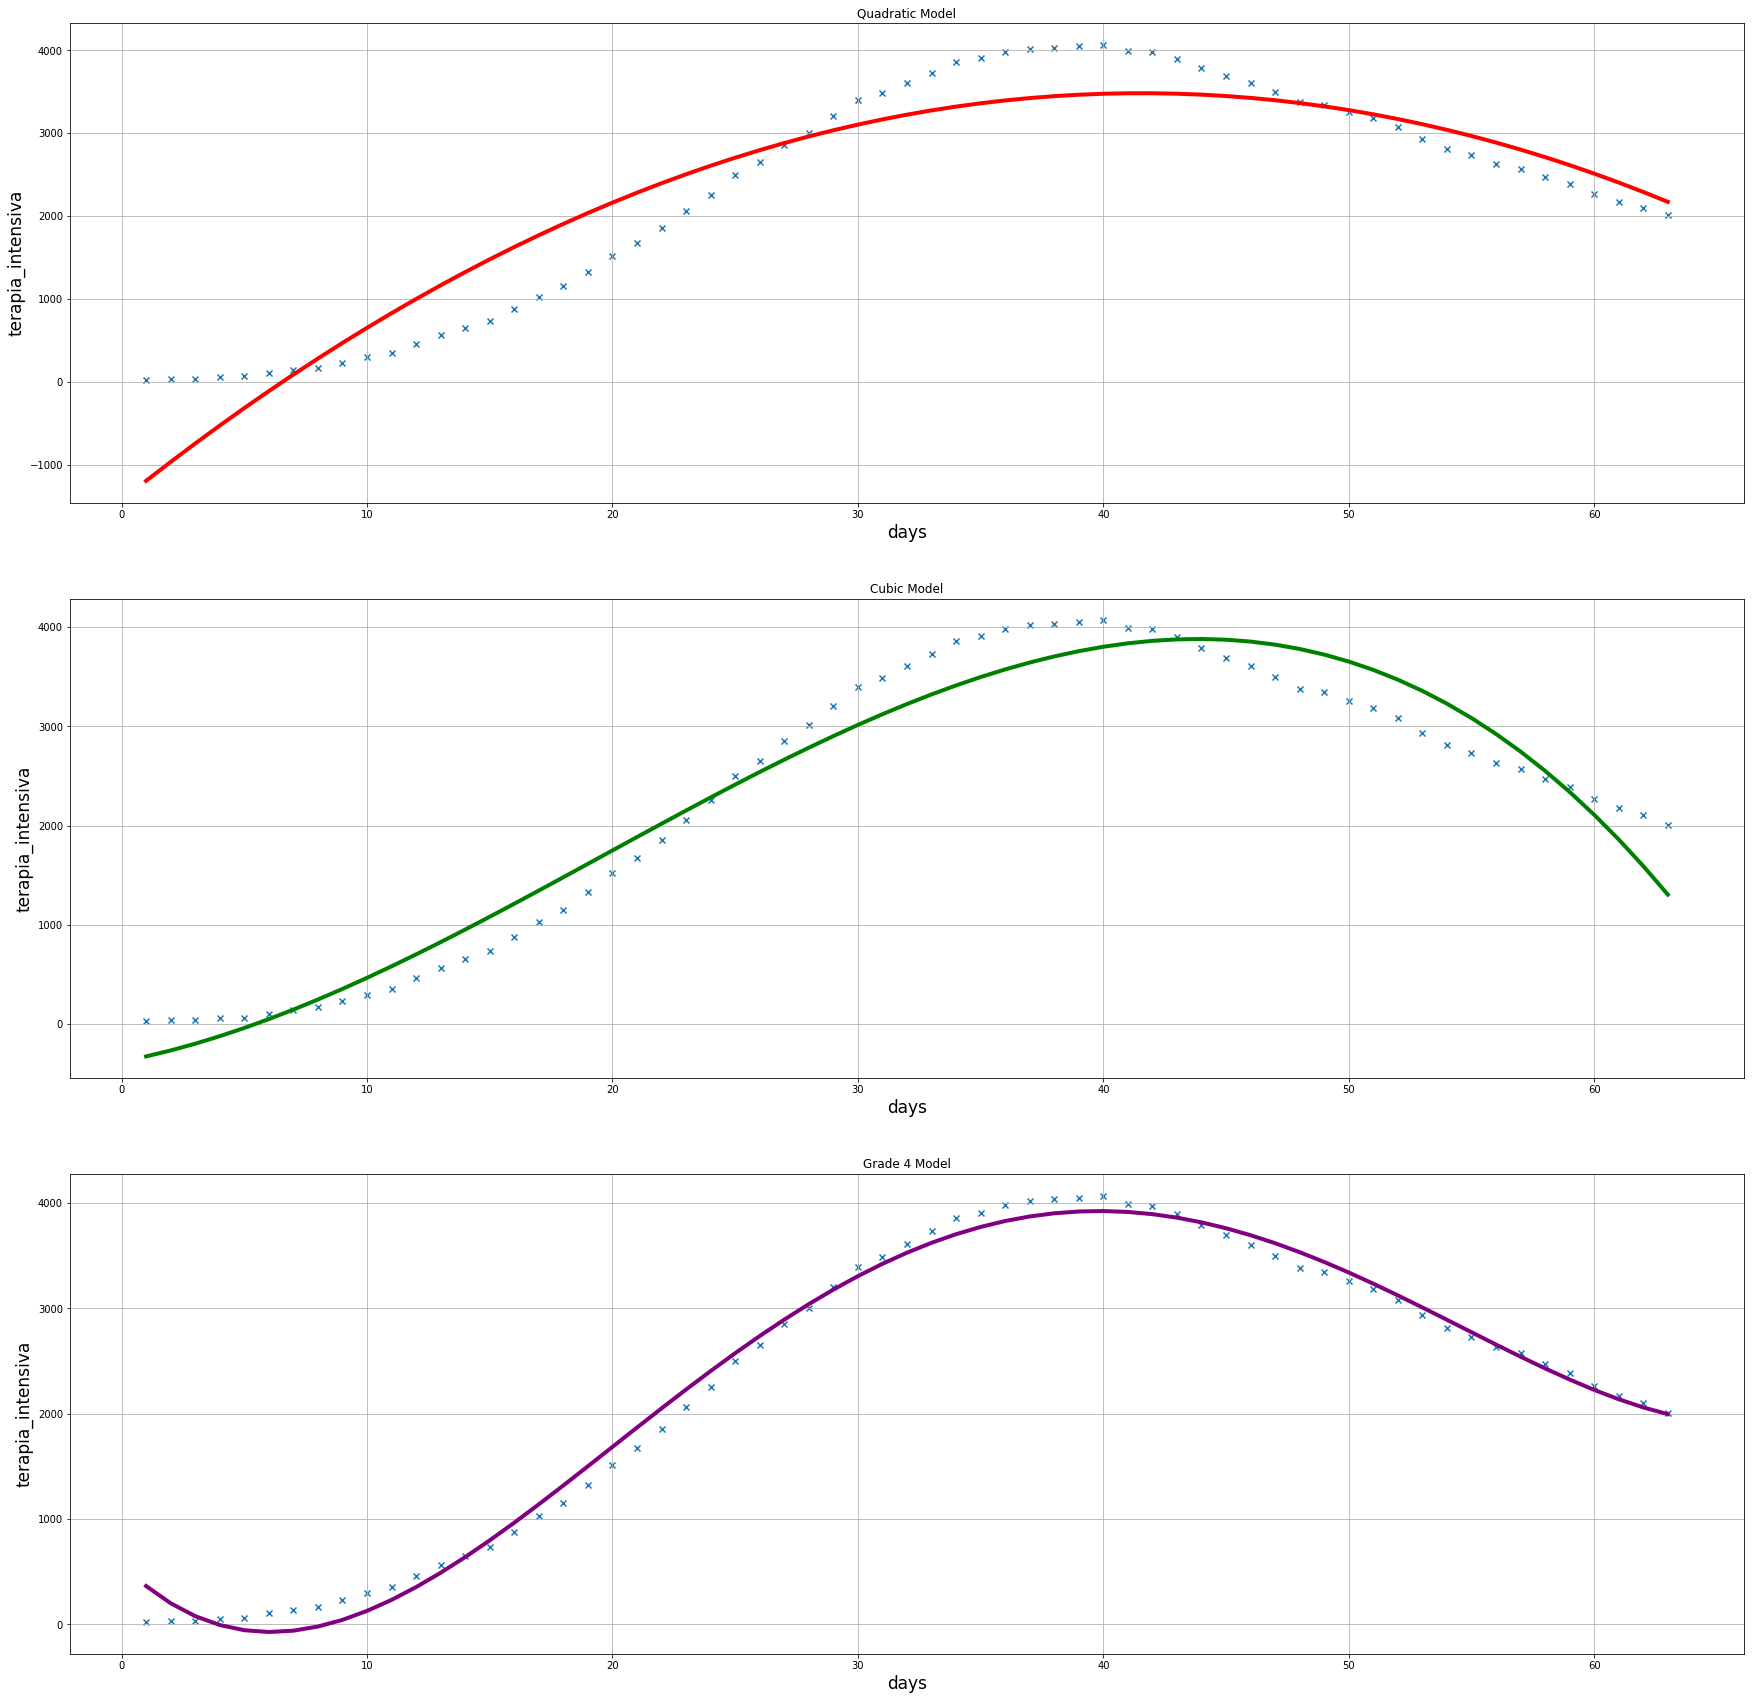

In [50]:
fig=plt.figure(figsize= (30,30))
ax1 = fig.add_subplot(311)
ax2 = fig.add_subplot(312)
ax3= fig.add_subplot(313)

ax1.scatter(x_data.values, y_data, marker='x')
ax1.plot(X_2_d, yhat_2_d, c = 'r', linewidth=4)

ax2.scatter(x_data, y_data, marker='x')
ax2.plot(X_3_d, yhat_3_d, c = 'g', linewidth=4)

ax3.scatter(x_data ,  y_data, marker='x')
ax3.plot(X_4_d, yhat_4_d, c = 'purple', linewidth=4)

ax1.title.set_text('Quadratic Model')
ax2.title.set_text('Cubic Model')
ax3.title.set_text('Grade 4 Model')




for ax in fig.axes:
    ax.set_xlabel(r'days', fontsize=17)
    ax.set_ylabel(r'terapia_intensiva', fontsize=17)
    ax.grid()



## Inference 

In [51]:
def inference_ne_d_2 (theta , x ): 
    y = theta[0] + theta[1]* x + theta[2]* x**2
    return y

In [52]:
def inference_ne_d_3 (theta , x ): 
    y = theta[0] + theta[1]* x + theta[2]* x**2 + theta[3]* x**3
    return y

In [53]:
def inference_ne_d_4 (theta , x ): 
    y = theta[0] + theta[1]* x + theta[2]* x**2 + theta[3]* x**3+ theta[4]* x**4
    return y


In [54]:
def inference_ne_d_5 (theta , x ): 
    y = theta[0] + theta[1]* x + theta[2]* x**2 + theta[3]* x**3+ theta[4]* x**4 + theta[5]* x**5
    return y



In [55]:
future_data_2 = [64 ,65, 66 , 67, 68, 69, 70 , 71 , 72 , 73, 74, 75, 76, 77, 78, 79, 80 ]




predictions_2 = []
predictions_3 = []
predictions_4 = []

for i in future_data_2:
     
    p_2 = inference_ne_d_2(theta_ne_2_d ,i)
    p_3 = inference_ne_d_3(theta_ne_3_d ,i)
    p_4 = inference_ne_d_4(theta_ne_4_d ,i)
    predictions_2.append(p_2)
    predictions_3.append(p_3)
    predictions_4.append(p_4)


## Predictions

In [56]:
q = 0
for i in predictions_2:
    if i >= 0:
        q = q+1
        continue
    else:
        break

o = 0
for i in predictions_3:
    if i >= 0:
        o = o+1
        continue
    else:
        break

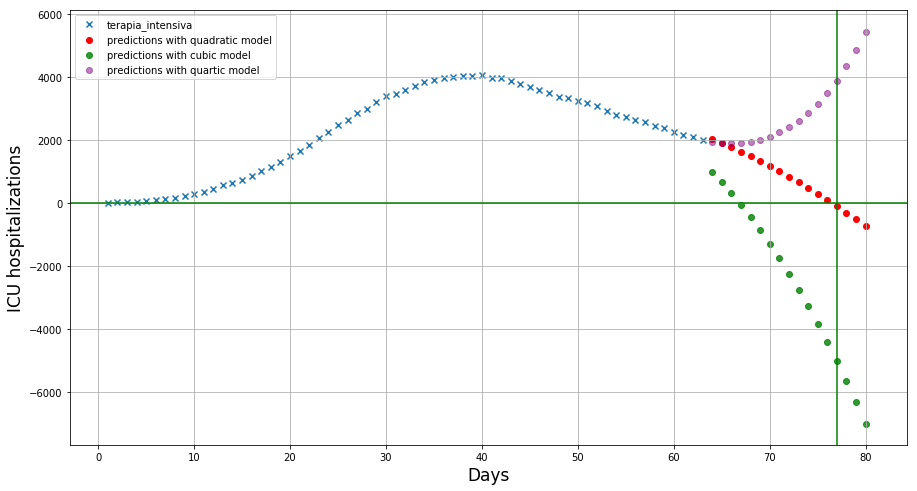

In [57]:



fig = plt.figure(figsize= (15,8))
plt.scatter(x_data.values, y_data, marker='x')

plt.scatter(future_data_2 , predictions_2 , marker = "o" , c='r' , label = "predictions with quadratic model" , alpha = 1)
plt.scatter(future_data_2 , predictions_3 , marker = "o" ,  c='g' , label = "predictions with cubic model" , alpha = 0.8)
plt.scatter(future_data_2 , predictions_4 , marker = "o" , c = 'purple' ,label = "predictions with quartic model" , alpha = 0.5)
plt.grid()
plt.xlabel("Days" , fontsize = 17)
plt.ylabel("ICU hospitalizations", fontsize = 17)
plt.axhline(0,  c='g')
plt.axvline(future_data_2[q],  c='g')
plt.legend()


The quadratic model seems to be the best model that fits the data, so we can search for the 0 ICU hospitalizations point in this model.

In [58]:
print(" The quadratic model predicts a value 0 for ICU hospitalizations after {} days from 24-02-2020".format(future_data_2[q]))
print(" The cubic model predicts a value 0 for ICU hospitalizations after {} days from 24-02-2020".format(future_data_2[o]))

 The quadratic model predicts a value 0 for ICU hospitalizations after 77 days from 24-02-2020
 The cubic model predicts a value 0 for ICU hospitalizations after 67 days from 24-02-2020


## What if...

In [59]:
d_poly_5 = np.c_[np.ones((giorni.shape[0], 1)), polynomial_features(giorni,  5)]
future_data_2 = [64 ,65, 66 , 67, 68, 69, 70 , 71 , 72 , 73, 74, 75, 76, 77, 78, 79, 80 ,81,82,83,84,85,86]

y_data = dataframe_andamento_nazionale['totale_casi']
x_data = giorni


theta_ne_2_tc, _ = normalEquations(d_poly_2, y_data)
theta_ne_3_tc, _ = normalEquations(d_poly_3, y_data)
theta_ne_4_tc, _ = normalEquations(d_poly_4, y_data)
theta_ne_5_tc, _ = normalEquations(d_poly_5, y_data)

predictions_2_tc = []
predictions_3_tc = []
predictions_4_tc = []
predictions_5_tc = []

for i in future_data_2:
     
    p_2 = inference_ne_d_2(theta_ne_2_tc ,i)
    p_3 = inference_ne_d_3(theta_ne_3_tc ,i)
    p_4 = inference_ne_d_4(theta_ne_4_tc ,i)
    p_5 = inference_ne_d_5(theta_ne_5_tc ,i)
    predictions_2_tc.append(p_2)
    predictions_3_tc.append(p_3)
    predictions_4_tc.append(p_4)
    predictions_5_tc.append(p_5)

    

In [60]:
t = 0
for i in predictions_2_tc:
    if i < 226947 :
        t = t+1
        continue
    else:
        break
print(t)

r = 0
for i in predictions_3_tc:
    if i <= 226947 :
        r = r+1
        continue
    else:
        break

        
c = 0
for i in predictions_4_tc:
    if i < 226947 :
        c= c+1
        continue
    else:
        break




print(predictions_2_tc)


2
[219889.38238773105, 225057.88353035884, 230269.84981064947, 235525.2812286028, 240824.17778421892, 246166.53947749786, 251552.36630843958, 256981.658277044, 262454.41538331134, 267970.6376272414, 273530.32500883425, 279133.4775280898, 284780.09518500813, 290470.1779795894, 296203.7259118333, 301980.73898173997, 307801.21718930954, 313665.1605345418, 319572.56901743694, 325523.44263799477, 331517.7813962153, 337555.5852920988, 343636.8543256449]


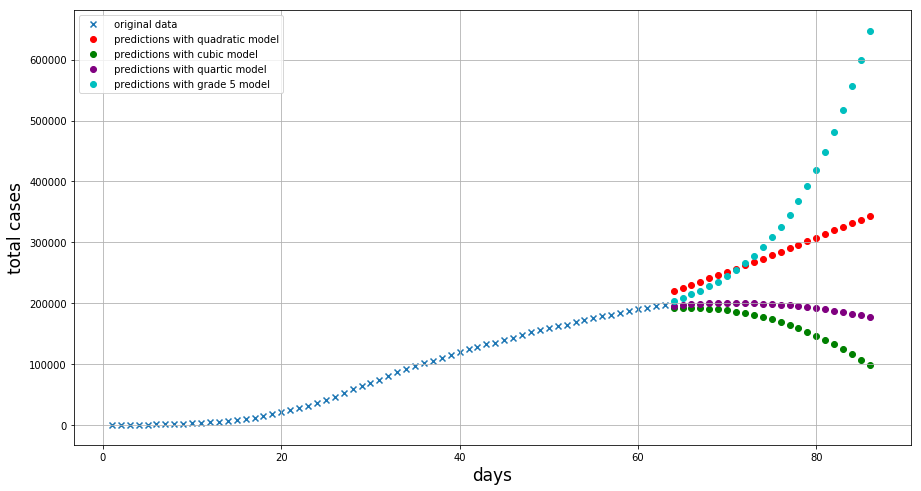

In [61]:
fig=plt.figure(figsize= (15,8))


plt.scatter(x_data.values, y_data, marker='x' , label = " original data")
plt.scatter(future_data_2,predictions_2_tc, c = 'r',label = " predictions with quadratic model" )
plt.scatter(future_data_2,predictions_3_tc, c = 'g',label = " predictions with cubic model" )
plt.scatter(future_data_2,predictions_4_tc, c = 'purple',label = " predictions with quartic model" )
plt.scatter(future_data_2,predictions_5_tc, c = 'c',label = " predictions with grade 5 model" )
plt.xlabel(r'days', fontsize=17)
plt.ylabel(r'total cases', fontsize=17)
plt.grid()
plt.legend()
plt.show()



In [62]:
print(" The quadratic model predicts a value  226947 for total cases after {} days from 24-02-2020".format(future_data_2[t]))


 The quadratic model predicts a value  226947 for total cases after 66 days from 24-02-2020
